# Compare Result

this notebook created for comparing result between predicted result from ML model and truth set 

In [1]:
!pip install venn

In [2]:
from venn import venn
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

from functools import reduce

In [3]:
columns = ["ID_Query","ID_Target","sequence_identity","alignment_length","number_of_mismatches","number_of_gap_openings", "start-position_in_query", "end-position_in_query", "start-position_in_target","end-position_in_target","E-value","bit_score"]

In [3]:
def create_report1(df,method,column,prediced_set,truth_set,total_AMPs):
    df.loc[method, column]= 0
    accuracy = (predict/total_AMPs )*100     
    set(prediced_set["ID"])
    set(truth_set['ID_Query'])
    return df

def plot_ven_AMP_NonAMP(sample_test,sample_groundtruth,prediced_set,truth_set):
    Samples = {
        sample_test:  set(prediced_set["ID"]),
        sample_groundtruth: set(truth_set['ID_Query']),
        }
    venn(Samples)
    #venn(Samples, fmt="{percentage:.2f}%")    
    
def accuracy_cal( predict , total_AMPs, cond):
    accuracy = (predict/total_AMPs )*100
    print(cond+" Accuracy Percentage = %.2f" % accuracy)
    return accuracy

In [67]:
method_dict = {
    'Ensemble': "Ensemble",
    'FastAI': 'FastAI', 
    'RF' : "RF",
    "XGBoost": "XG",
    "SVM": "SVM",
    "AmPep30": "ShortCNN",
    "CNN_RMSpop": "CNN_RMSpop",
    "CNN_Adam": "CNN_Adam",
    "ProtCNN" : "ProtCNN",
    "DNN" : "DNN"
}

_df_to_report_200 =  pd.DataFrame( columns=["AMP","NonAMP","Match(MMseq)","Accuracy %","_100_Match(MMseq)","_100_Accuracy %","_80_Match(MMseq)","_80_Accuracy %"],
    index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","AmPep30","CNN_RMSpop","CNN_Adam","ProtCNN","DNN"])
_df_to_report_30 =  pd.DataFrame( columns=["AMP","NonAMP","Match(MMseq)","Accuracy %"],
    index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","AmPep30","CNN_RMSpop","CNN_Adam","ProtCNN","DNN"])
_df_to_report =  pd.DataFrame( columns=["AMP","NonAMP","Match(MMseq)","Accuracy %","_100_Match(MMseq)","_100_Accuracy %","_80_Match(MMseq)","_80_Accuracy %"],
    index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","AmPep30","CNN_RMSpop","CNN_Adam","ProtCNN","DNN"])

## DECockroach

In [149]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result/DECockroach.len15.MLResult.plk")
DECockroach_ML

,ID,class
0,0,0
1,1,0
2,3,0
3,4,1
4,5,0
...,...,...
199,894298,0
200,894299,0
201,894303,0
202,894304,0


In [150]:
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/DECockroach.alnRes.m8.len15.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())
DECockroach_len15_truth

,ID_Query,ID_Target,sequence_identity,alignment_length,number_of_mismatches,number_of_gap_openings,start-position_in_query,end-position_in_query,start-position_in_target,end-position_in_target,E-value,bit_score
0,143923,dbAMP_12224,0.550,20,9,0,1,20,44,63,4.967000e-04,31
1,143923,L03A000107|,0.550,20,9,0,1,20,66,85,4.967000e-04,31
2,775878,420_peptideDB.anti|peptideDB.anti,0.882,17,2,0,1,17,7,23,2.010000e-08,43
3,775878,1676_peptideDB.anti|peptideDB.anti,0.882,17,2,0,1,17,32,48,2.010000e-08,43
4,775878,1653_peptideDB.anti|peptideDB.anti,0.882,17,2,0,1,17,32,48,2.010000e-08,43
...,...,...,...,...,...,...,...,...,...,...,...,...
4076,178554,EN95455285|A|P81709|Lysozyme,0.588,17,7,0,1,17,102,118,5.571000e-04,30
4077,178554,EN60134206|A|P37712|Lysozyme,0.666,15,5,0,1,15,102,116,5.571000e-04,30
4078,178554,EN84379296|A|Q659U1|Lysozyme,0.588,17,7,0,1,17,120,136,5.571000e-04,30
4079,178554,EN34191792|A|Q659U0|Lysozyme,0.588,17,7,0,1,17,120,136,5.571000e-04,30


<AxesSubplot:>

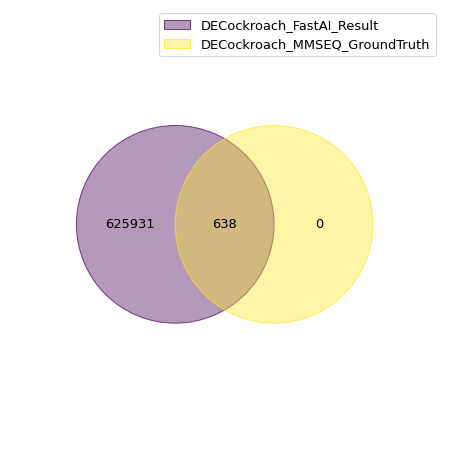

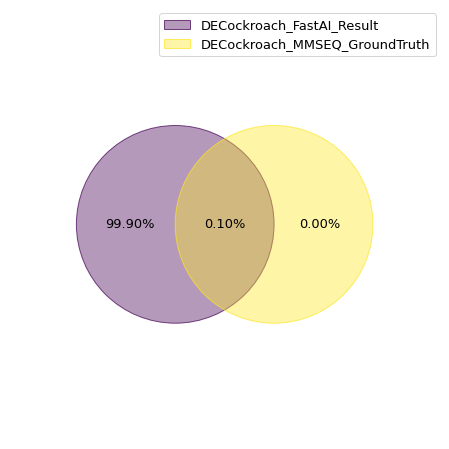

In [151]:
DECockroachSamples = {
    "DECockroach_FastAI_Result":  set(DECockroach_ML["ID"]),
    "DECockroach_MMSEQ_GroundTruth": set(DECockroach_len15_truth['ID_Query']),
}
venn(DECockroachSamples)
venn(DECockroachSamples, fmt="{percentage:.2f}%")

<AxesSubplot:>

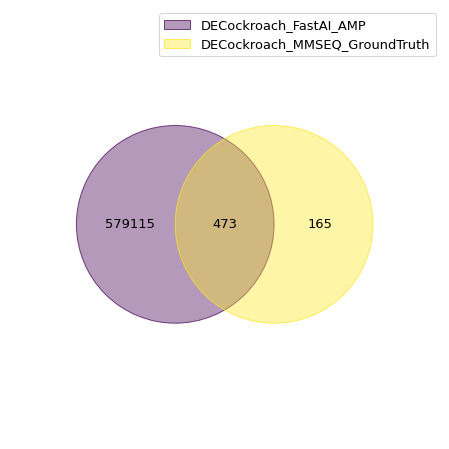

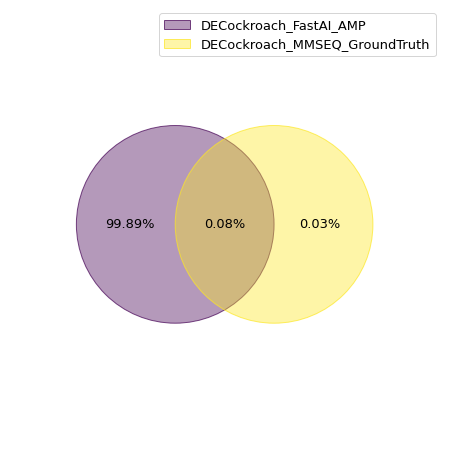

In [152]:
DECockroachSamples = {
    "DECockroach_FastAI_AMP":  set(DECockroach_AMPs_ML["ID"]),
    "DECockroach_MMSEQ_GroundTruth": set(DECockroach_len15_truth['ID_Query']),
}
venn(DECockroachSamples)
venn(DECockroachSamples, fmt="{percentage:.2f}%")

In [156]:
filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())
print(DECockroach_total_AMPS_with100)

77


<AxesSubplot:>

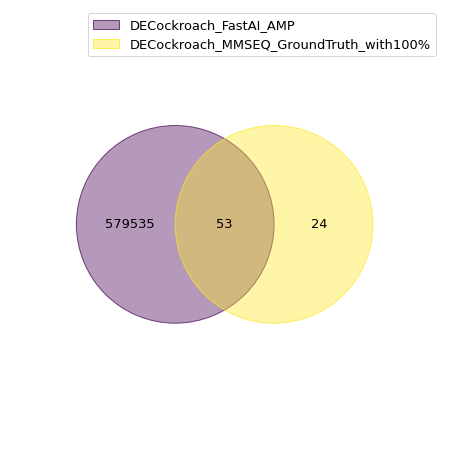

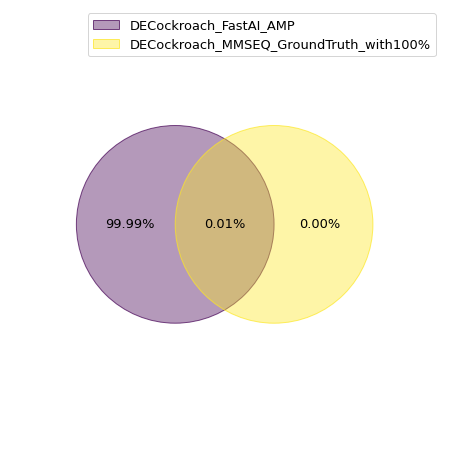

In [154]:
DECockroachSamples = {
    "DECockroach_FastAI_AMP":  set(DECockroach_AMPs_ML["ID"]),
    "DECockroach_MMSEQ_GroundTruth_with100%": set(filtered_DECockroach_len15_truth['ID_Query']),
}
venn(DECockroachSamples)
venn(DECockroachSamples, fmt="{percentage:.2f}%")

In [129]:
accuracy = (473/DECockroach_total_AMPS )*100
print("%.2f" % accuracy)
accuracy = (53/DECockroach_total_AMPS_with100 )*100
print("%.2f" % accuracy)

74.14
68.83


# ---------------------------------------

From A)  first we use prediction result ( which contains both NonAMP  and AMP  )  ( Purple bubble here )  intersect with a ground truth set.

Next , In B) we exclude the non AMPs out from prediction results , we see a high number in ( purple bubble). This means  Most of the sequence predict to be AMP rather than to be a non AMP (you  can see the  number  in purple part between A and B) which is not likely to be  true . So in this case show a Very high false positive rate on the prediction (i.e., predict Non AMP to be AMP , high amount in purple color in Venn diagram),  
(If we calculate non amp  625K-579K = 46K.)

Next if we look into yellow bubble , there is a remaining  number  in yellow which we consider it as a false negative  because the model predict these  as the Non AMPs.

## Version 2

In [13]:
for key, value in method_dict.items():
    method = value
    print("-----------------"+ method +"-------------------------")
    DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_"+method+"/DECockroach.len15.MLResult.plk")
    DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/DECockroach.alnRes.m8.len15.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
    
    DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
    DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())
    
    # AMP and Non AMP compare with ground truth
    #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
    #                Bat_ML,
    #                Bat_len10_truth
    #               )
    # AMP only compares with ground truth
    #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
    #                Bat_AMPs_ML,
    #                Bat_len10_truth
    #               )
    # AMP only compares with filtering 80% seq identity on ground truth
    filtered_DECockroach_len15_truth =DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] >=0.8]
    DECockroach_total_AMPS_with80= len(filtered_DECockroach_len15_truth['ID_Query'].unique())
    AMP_match_Truth_80 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
    accuracy_80 = accuracy_cal(len(AMP_match_Truth_80),DECockroach_total_AMPS_with80,"80%")  
    
    # AMP only compares with filtering 100% seq identity on ground truth
    filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
    DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

    #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
    #                    Bat_AMPs_ML,
    #                    filtered_BAT_len10_truth
    #               )
    
    
    # AMP match Truthset
    AMP_match_Truth = set(DECockroach_AMPs_ML["ID"]).intersection(set(DECockroach_len15_truth['ID_Query']))
    accuracy = accuracy_cal(len(AMP_match_Truth),DECockroach_total_AMPS, "no condi")
    
    AMP_match_Truth_100 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
    # 100%
    accuracy_100 = accuracy_cal(len(AMP_match_Truth_100),DECockroach_total_AMPS_with100, "100%")
    
    #print("Total result " + str(len(DECockroach_ML)) )
    #print("Total predicted AMP " + str(len(DECockroach_AMPs_ML) ) )
    #print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
    #print("Total match AMP " + str(len(AMP_match_Truth )))
   # print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
    #print("Total match AMP with_100 " + str( len(AMP_match_Truth_100) ))
   # print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )
    
    
    _df_to_report.loc[key, 'AMP']=len(DECockroach_AMPs_ML) 
    _df_to_report.loc[key, 'NonAMP']=len(DECockroach_ML) -len(DECockroach_AMPs_ML)
    _df_to_report.loc[key, 'Match(MMseq)']=len(AMP_match_Truth )
    _df_to_report.loc[key, 'Accuracy %']= round(accuracy, 2)
    _df_to_report.loc[key, '_100_Match(MMseq)']= int(len(AMP_match_Truth_100))
    _df_to_report.loc[key, '_100_Accuracy %']=round(accuracy_100, 2)
    _df_to_report.loc[key, '_80_Match(MMseq)']= int(len(AMP_match_Truth_80))
    _df_to_report.loc[key, '_80_Accuracy %']=round(accuracy_80, 2)
    
    #print("-------------------------------------------------")
    

-----------------Ensemble-------------------------


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/vdb/DECockroach/cd100/result_2_Ensemble/DECockroach.len15.MLResult.plk'

In [136]:
_df_to_report

,AMP,NonAMP,Match(MMseq),Accuracy %,_100_Match(MMseq),_100_Accuracy %,_80_Match(MMseq),_80_Accuracy %
Ensemble,325636,300933,311,48.75,42,54.55,148.0,46.98
FastAI,423085,203484,449,70.38,62,80.52,233.0,73.97
RF,454656,171913,368,57.68,41,53.25,152.0,48.25
XGBoost,413005,213564,417,65.36,57,74.03,219.0,69.52
SVM,330734,295835,370,57.99,63,81.82,195.0,61.90
AmPep30,369870,256699,297,46.55,28,36.36,134.0,42.54
CNN_RMSpop,224368,402201,182,28.53,20,25.97,58.0,18.41
CNN_Adam,343297,283272,335,52.51,49,63.64,158.0,50.16
ProtCNN,300985,325584,307,48.12,42,54.55,152.0,48.25
DNN,465106,161463,437,68.50,31,40.26,201.0,63.81


In [15]:
for key, value in method_dict.items():
    method = value
    print("-----------------"+ method +"-------------------------")
    DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2/result_2_"+method+"/DECockroach.len15.MLResult.plk")
    DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output200/DECockroach.len200.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
    DECockroach_ML = DECockroach_ML[DECockroach_ML["length"]<= 200]
    DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
    DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())
    
    # AMP and Non AMP compare with ground truth
    #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
    #                Bat_ML,
    #                Bat_len10_truth
    #               )
    # AMP only compares with ground truth
    #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
    #                Bat_AMPs_ML,
    #                Bat_len10_truth
    #               )
 
    # AMP only compares with filtering 80% seq identity on ground truth
    filtered_DECockroach_len15_truth =DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] >=0.8]
    DECockroach_total_AMPS_with80= len(filtered_DECockroach_len15_truth['ID_Query'].unique())
    AMP_match_Truth_80 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
    accuracy_80 = accuracy_cal(len(AMP_match_Truth_80),DECockroach_total_AMPS_with80,"80%") 
    
    # AMP only compares with filtering 100% seq identity on ground truth
    filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
    DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

    #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
    #                    Bat_AMPs_ML,
    #                    filtered_BAT_len10_truth
    #               )
    
    
    # AMP match Truthset
    AMP_match_Truth = set(DECockroach_AMPs_ML["ID"]).intersection(set(DECockroach_len15_truth['ID_Query']))
    accuracy = accuracy_cal(len(AMP_match_Truth),DECockroach_total_AMPS,"no condi")
    
    AMP_match_Truth_100 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
    # 100%
    accuracy_100 = accuracy_cal(len(AMP_match_Truth_100),DECockroach_total_AMPS_with100,"100%")
    
    #print("Total result " + str(len(DECockroach_ML)) )
    #print("Total predicted AMP " + str(len(DECockroach_AMPs_ML) ) )
    #print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
    #print("Total match AMP " + str(len(AMP_match_Truth )))
   # print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
    #print("Total match AMP with_100 " + str( len(AMP_match_Truth_100) ))
   # print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )
    
    
    _df_to_report_200.loc[key, 'AMP']=len(DECockroach_AMPs_ML) 
    _df_to_report_200.loc[key, 'NonAMP']=len(DECockroach_ML) -len(DECockroach_AMPs_ML)
    _df_to_report_200.loc[key, 'Match(MMseq)']=len(AMP_match_Truth )
    _df_to_report_200.loc[key, 'Accuracy %']= round(accuracy, 2)
    _df_to_report_200.loc[key, '_100_Match(MMseq)']= int(len(AMP_match_Truth_100))
    _df_to_report_200.loc[key, '_100_Accuracy %']=round(accuracy_100, 2)
    _df_to_report_200.loc[key, '_80_Match(MMseq)']= int(len(AMP_match_Truth_80))
    _df_to_report_200.loc[key, '_80_Accuracy %']=round(accuracy_80, 2)
    
    #print("-------------------------------------------------")

-----------------Ensemble-------------------------
80% Accuracy Percentage = 42.81
no condi Accuracy Percentage = 46.83
100% Accuracy Percentage = 42.62
-----------------FastAI-------------------------
80% Accuracy Percentage = 72.26
no condi Accuracy Percentage = 69.43
100% Accuracy Percentage = 77.05
-----------------RF-------------------------
80% Accuracy Percentage = 44.18
no condi Accuracy Percentage = 56.10
100% Accuracy Percentage = 40.98
-----------------XG-------------------------
80% Accuracy Percentage = 67.12
no condi Accuracy Percentage = 64.07
100% Accuracy Percentage = 67.21
-----------------SVM-------------------------
80% Accuracy Percentage = 58.90
no condi Accuracy Percentage = 56.42
100% Accuracy Percentage = 77.05
-----------------ShortCNN-------------------------
80% Accuracy Percentage = 45.89
no condi Accuracy Percentage = 48.29
100% Accuracy Percentage = 45.90
-----------------CNN_RMSpop-------------------------
80% Accuracy Percentage = 12.33
no condi Accurac

In [17]:
_df_to_report_200

,AMP,NonAMP,Match(MMseq),Accuracy %,_100_Match(MMseq),_100_Accuracy %,_80_Match(MMseq),_80_Accuracy %
Ensemble,325605,300897,288,46.83,26,42.62,125,42.81
FastAI,423053,203449,427,69.43,47,77.05,211,72.26
RF,454623,171879,345,56.10,25,40.98,129,44.18
XGBoost,412967,213535,394,64.07,41,67.21,196,67.12
SVM,330700,295802,347,56.42,47,77.05,172,58.90
AmPep30,369859,256643,297,48.29,28,45.90,134,45.89
CNN_RMSpop,224339,402163,160,26.02,4,6.56,36,12.33
CNN_Adam,343257,283245,312,50.73,33,54.10,135,46.23
ProtCNN,300954,325548,284,46.18,26,42.62,129,44.18
DNN,465094,161408,436,70.89,31,50.82,200,68.49


In [16]:
for key, value in method_dict.items():
    method = value
    print("-----------------"+ method +"-------------------------")
    DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2/result_2_"+method+"/DECockroach.len15.MLResult.plk")
    DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output30/DECockroach.len30.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
    DECockroach_ML = DECockroach_ML[DECockroach_ML["length"]<= 30]
    DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
    DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())
    
    # AMP and Non AMP compare with ground truth
    #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
    #                Bat_ML,
    #                Bat_len10_truth
    #               )
    # AMP only compares with ground truth
    #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
    #                Bat_AMPs_ML,
    #                Bat_len10_truth
    #               )
     # AMP only compares with filtering 80% seq identity on ground truth
    filtered_DECockroach_len15_truth =DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] >=0.8]
    DECockroach_total_AMPS_with80= len(filtered_DECockroach_len15_truth['ID_Query'].unique())
    AMP_match_Truth_80 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
    accuracy_80 = accuracy_cal(len(AMP_match_Truth_80),DECockroach_total_AMPS_with80,"80%") 
    
    # AMP only compares with filtering 100% seq identity on ground truth
    filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
    DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

    #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
    #                    Bat_AMPs_ML,
    #                    filtered_BAT_len10_truth
    #               )
    
    
    # AMP match Truthset
    AMP_match_Truth = set(DECockroach_AMPs_ML["ID"]).intersection(set(DECockroach_len15_truth['ID_Query']))
    accuracy = accuracy_cal(len(AMP_match_Truth),DECockroach_total_AMPS,"no condi")
    
    AMP_match_Truth_100 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
    # 100%
    accuracy_100 = accuracy_cal(len(AMP_match_Truth_100),DECockroach_total_AMPS_with100,"100%")
    
    #print("Total result " + str(len(DECockroach_ML)) )
    #print("Total predicted AMP " + str(len(DECockroach_AMPs_ML) ) )
    #print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
    #print("Total match AMP " + str(len(AMP_match_Truth )))
   # print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
    #print("Total match AMP with_100 " + str( len(AMP_match_Truth_100) ))
   # print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )
    
    
    _df_to_report_30.loc[key, 'AMP']=len(DECockroach_AMPs_ML) 
    _df_to_report_30.loc[key, 'NonAMP']=len(DECockroach_ML) -len(DECockroach_AMPs_ML)
    _df_to_report_30.loc[key, 'Match(MMseq)']=len(AMP_match_Truth )
    _df_to_report_30.loc[key, 'Accuracy %']= round(accuracy, 2)
    _df_to_report_30.loc[key, '_100_Match(MMseq)']= int(len(AMP_match_Truth_100))
    _df_to_report_30.loc[key, '_100_Accuracy %']=round(accuracy_100, 2)
    _df_to_report_30.loc[key, '_80_Match(MMseq)']= int(len(AMP_match_Truth_80))
    _df_to_report_30.loc[key, '_80_Accuracy %']=round(accuracy_80, 2)
    
    #print("-------------------------------------------------")

-----------------Ensemble-------------------------
80% Accuracy Percentage = 41.60
no condi Accuracy Percentage = 47.13
100% Accuracy Percentage = 44.44
-----------------FastAI-------------------------
80% Accuracy Percentage = 72.90
no condi Accuracy Percentage = 72.87
100% Accuracy Percentage = 81.48
-----------------RF-------------------------
80% Accuracy Percentage = 41.60
no condi Accuracy Percentage = 55.25
100% Accuracy Percentage = 38.89
-----------------XG-------------------------
80% Accuracy Percentage = 66.41
no condi Accuracy Percentage = 64.55
100% Accuracy Percentage = 68.52
-----------------SVM-------------------------
80% Accuracy Percentage = 58.02
no condi Accuracy Percentage = 57.03
100% Accuracy Percentage = 79.63
-----------------ShortCNN-------------------------
80% Accuracy Percentage = 47.71
no condi Accuracy Percentage = 51.29
100% Accuracy Percentage = 51.85
-----------------CNN_RMSpop-------------------------
80% Accuracy Percentage = 8.78
no condi Accuracy

In [18]:
_df_to_report_30

,AMP,NonAMP,Match(MMseq),Accuracy %,_100_Match(MMseq),_100_Accuracy %,_80_Match(MMseq),_80_Accuracy %
Ensemble,318932,289894,238,47.13,24.0,44.44,109.0,41.60
FastAI,415539,193287,368,72.87,44.0,81.48,191.0,72.90
RF,445533,163293,279,55.25,21.0,38.89,109.0,41.60
XGBoost,404124,204702,326,64.55,37.0,68.52,174.0,66.41
SVM,324304,284522,288,57.03,43.0,79.63,152.0,58.02
AmPep30,361017,247809,259,51.29,28.0,51.85,125.0,47.71
CNN_RMSpop,218579,390247,110,21.78,3.0,5.56,23.0,8.78
CNN_Adam,335212,273614,249,49.31,29.0,53.70,115.0,43.89
ProtCNN,292751,316075,231,45.74,23.0,42.59,111.0,42.37
DNN,454750,154076,371,73.47,30.0,55.56,182.0,69.47


# Result_3

## FULL

In [68]:
for key, value in method_dict.items():
    try:
        method = value
        print("-----------------"+ method +"-------------------------")
        DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_3/result_"+method+"/DECockroach.len15.MLResult.plk")
        DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/DECockroach.alnRes.m8.len15.tsv"
                                          ,encoding = "ISO-8859-1", sep='\t',header=0)

        DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
        DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

        # AMP and Non AMP compare with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_ML,
        #                Bat_len10_truth
        #               )
        # AMP only compares with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_AMPs_ML,
        #                Bat_len10_truth
        #               )
        # AMP only compares with filtering 80% seq identity on ground truth
        filtered_DECockroach_len15_truth =DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] >=0.8]
        DECockroach_total_AMPS_with80= len(filtered_DECockroach_len15_truth['ID_Query'].unique())
        AMP_match_Truth_80 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
        accuracy_80 = accuracy_cal(len(AMP_match_Truth_80),DECockroach_total_AMPS_with80,"80%")  

        # AMP only compares with filtering 100% seq identity on ground truth
        filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
        DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                    Bat_AMPs_ML,
        #                    filtered_BAT_len10_truth
        #               )


        # AMP match Truthset
        AMP_match_Truth = set(DECockroach_AMPs_ML["ID"]).intersection(set(DECockroach_len15_truth['ID_Query']))
        accuracy = accuracy_cal(len(AMP_match_Truth),DECockroach_total_AMPS, "no condi")

        AMP_match_Truth_100 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
        # 100%
        accuracy_100 = accuracy_cal(len(AMP_match_Truth_100),DECockroach_total_AMPS_with100, "100%")

        #print("Total result " + str(len(DECockroach_ML)) )
        #print("Total predicted AMP " + str(len(DECockroach_AMPs_ML) ) )
        #print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
        #print("Total match AMP " + str(len(AMP_match_Truth )))
       # print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
        #print("Total match AMP with_100 " + str( len(AMP_match_Truth_100) ))
       # print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )


        _df_to_report.loc[key, 'AMP']=len(DECockroach_AMPs_ML) 
        _df_to_report.loc[key, 'NonAMP']=len(DECockroach_ML) -len(DECockroach_AMPs_ML)
        _df_to_report.loc[key, 'Match(MMseq)']=len(AMP_match_Truth )
        _df_to_report.loc[key, 'Accuracy %']= round(accuracy, 2)
        _df_to_report.loc[key, '_100_Match(MMseq)']= int(len(AMP_match_Truth_100))
        _df_to_report.loc[key, '_100_Accuracy %']=round(accuracy_100, 2)
        _df_to_report.loc[key, '_80_Match(MMseq)']= int(len(AMP_match_Truth_80))
        _df_to_report.loc[key, '_80_Accuracy %']=round(accuracy_80, 2)

        #print("-------------------------------------------------")
    except:
        continue

-----------------Ensemble-------------------------
-----------------FastAI-------------------------
80% Accuracy Percentage = 92.70
no condi Accuracy Percentage = 87.15
100% Accuracy Percentage = 90.91
-----------------RF-------------------------
80% Accuracy Percentage = 51.11
no condi Accuracy Percentage = 63.01
100% Accuracy Percentage = 54.55
-----------------XG-------------------------
80% Accuracy Percentage = 60.95
no condi Accuracy Percentage = 64.42
100% Accuracy Percentage = 58.44
-----------------SVM-------------------------
-----------------ShortCNN-------------------------
-----------------CNN_RMSpop-------------------------
80% Accuracy Percentage = 77.14
no condi Accuracy Percentage = 68.50
100% Accuracy Percentage = 83.12
-----------------CNN_Adam-------------------------
80% Accuracy Percentage = 68.57
no condi Accuracy Percentage = 63.64
100% Accuracy Percentage = 83.12
-----------------ProtCNN-------------------------
80% Accuracy Percentage = 76.19
no condi Accuracy

In [69]:
_df_to_report

,AMP,NonAMP,Match(MMseq),Accuracy %,_100_Match(MMseq),_100_Accuracy %,_80_Match(MMseq),_80_Accuracy %
Ensemble,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FastAI,543839,82730,556,87.15,70,90.91,292,92.70
RF,478970,147599,402,63.01,42,54.55,161,51.11
XGBoost,438022,188547,411,64.42,45,58.44,192,60.95
SVM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AmPep30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNN_RMSpop,385731,240838,437,68.50,64,83.12,243,77.14
CNN_Adam,398562,228007,406,63.64,64,83.12,216,68.57
ProtCNN,456683,169886,437,68.50,57,74.03,240,76.19
DNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## <= 200 aa

In [70]:
for key, value in method_dict.items():
    try:
        method = value
        print("-----------------"+ method +"-------------------------")
        DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_3/result_"+method+"/DECockroach.len15.MLResult.plk")
        DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/DECockroach.alnRes.m8.len15.tsv"
                                          ,encoding = "ISO-8859-1", sep='\t',header=0)
        DECockroach_ML = DECockroach_ML[DECockroach_ML["length"]<= 200]
        DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
        DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

        # AMP and Non AMP compare with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_ML,
        #                Bat_len10_truth
        #               )
        # AMP only compares with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_AMPs_ML,
        #                Bat_len10_truth
        #               )
        # AMP only compares with filtering 80% seq identity on ground truth
        filtered_DECockroach_len15_truth =DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] >=0.8]
        DECockroach_total_AMPS_with80= len(filtered_DECockroach_len15_truth['ID_Query'].unique())
        AMP_match_Truth_80 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
        accuracy_80 = accuracy_cal(len(AMP_match_Truth_80),DECockroach_total_AMPS_with80,"80%")  

        # AMP only compares with filtering 100% seq identity on ground truth
        filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
        DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                    Bat_AMPs_ML,
        #                    filtered_BAT_len10_truth
        #               )


        # AMP match Truthset
        AMP_match_Truth = set(DECockroach_AMPs_ML["ID"]).intersection(set(DECockroach_len15_truth['ID_Query']))
        accuracy = accuracy_cal(len(AMP_match_Truth),DECockroach_total_AMPS, "no condi")

        AMP_match_Truth_100 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
        # 100%
        accuracy_100 = accuracy_cal(len(AMP_match_Truth_100),DECockroach_total_AMPS_with100, "100%")

        #print("Total result " + str(len(DECockroach_ML)) )
        #print("Total predicted AMP " + str(len(DECockroach_AMPs_ML) ) )
        #print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
        #print("Total match AMP " + str(len(AMP_match_Truth )))
       # print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
        #print("Total match AMP with_100 " + str( len(AMP_match_Truth_100) ))
       # print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )


        _df_to_report_200.loc[key, 'AMP']=len(DECockroach_AMPs_ML) 
        _df_to_report_200.loc[key, 'NonAMP']=len(DECockroach_ML) -len(DECockroach_AMPs_ML)
        _df_to_report_200.loc[key, 'Match(MMseq)']=len(AMP_match_Truth )
        _df_to_report_200.loc[key, 'Accuracy %']= round(accuracy, 2)
        _df_to_report_200.loc[key, '_100_Match(MMseq)']= int(len(AMP_match_Truth_100))
        _df_to_report_200.loc[key, '_100_Accuracy %']=round(accuracy_100, 2)
        _df_to_report_200.loc[key, '_80_Match(MMseq)']= int(len(AMP_match_Truth_80))
        _df_to_report_200.loc[key, '_80_Accuracy %']=round(accuracy_80, 2)

        #print("-------------------------------------------------")
    except:
        continue

-----------------Ensemble-------------------------
-----------------FastAI-------------------------
80% Accuracy Percentage = 85.71
no condi Accuracy Percentage = 83.70
100% Accuracy Percentage = 71.43
-----------------RF-------------------------
80% Accuracy Percentage = 43.81
no condi Accuracy Percentage = 59.40
100% Accuracy Percentage = 33.77
-----------------XG-------------------------
80% Accuracy Percentage = 53.65
no condi Accuracy Percentage = 60.82
100% Accuracy Percentage = 37.66
-----------------SVM-------------------------
-----------------ShortCNN-------------------------
-----------------CNN_RMSpop-------------------------
80% Accuracy Percentage = 69.84
no condi Accuracy Percentage = 64.89
100% Accuracy Percentage = 62.34
-----------------CNN_Adam-------------------------
80% Accuracy Percentage = 61.27
no condi Accuracy Percentage = 60.03
100% Accuracy Percentage = 62.34
-----------------ProtCNN-------------------------
80% Accuracy Percentage = 68.89
no condi Accuracy

In [71]:
_df_to_report_200

,AMP,NonAMP,Match(MMseq),Accuracy %,_100_Match(MMseq),_100_Accuracy %,_80_Match(MMseq),_80_Accuracy %
Ensemble,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FastAI,543810,82692,534,83.70,55,71.43,270,85.71
RF,478943,147559,379,59.40,26,33.77,138,43.81
XGBoost,437988,188514,388,60.82,29,37.66,169,53.65
SVM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AmPep30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNN_RMSpop,385691,240811,414,64.89,48,62.34,220,69.84
CNN_Adam,398532,227970,383,60.03,48,62.34,193,61.27
ProtCNN,456653,169849,414,64.89,41,53.25,217,68.89
DNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## <-= 30 aa

In [72]:
for key, value in method_dict.items():
    try:
        method = value
        print("-----------------"+ method +"-------------------------")
        DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_3/result_"+method+"/DECockroach.len15.MLResult.plk")
        DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output200/DECockroach.len200.tsv"
                                          ,encoding = "ISO-8859-1", sep='\t',header=0)
        DECockroach_ML = DECockroach_ML[DECockroach_ML["length"]<= 30]
        DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
        DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

        # AMP and Non AMP compare with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_ML,
        #                Bat_len10_truth
        #               )
        # AMP only compares with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_AMPs_ML,
        #                Bat_len10_truth
        #               )

        # AMP only compares with filtering 80% seq identity on ground truth
        filtered_DECockroach_len15_truth =DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] >=0.8]
        DECockroach_total_AMPS_with80= len(filtered_DECockroach_len15_truth['ID_Query'].unique())
        AMP_match_Truth_80 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
        accuracy_80 = accuracy_cal(len(AMP_match_Truth_80),DECockroach_total_AMPS_with80,"80%") 

        # AMP only compares with filtering 100% seq identity on ground truth
        filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
        DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                    Bat_AMPs_ML,
        #                    filtered_BAT_len10_truth
        #               )


        # AMP match Truthset
        AMP_match_Truth = set(DECockroach_AMPs_ML["ID"]).intersection(set(DECockroach_len15_truth['ID_Query']))
        accuracy = accuracy_cal(len(AMP_match_Truth),DECockroach_total_AMPS,"no condi")

        AMP_match_Truth_100 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
        # 100%
        accuracy_100 = accuracy_cal(len(AMP_match_Truth_100),DECockroach_total_AMPS_with100,"100%")

        #print("Total result " + str(len(DECockroach_ML)) )
        #print("Total predicted AMP " + str(len(DECockroach_AMPs_ML) ) )
        #print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
        #print("Total match AMP " + str(len(AMP_match_Truth )))
       # print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
        #print("Total match AMP with_100 " + str( len(AMP_match_Truth_100) ))
       # print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )


        _df_to_report_30.loc[key, 'AMP']=len(DECockroach_AMPs_ML) 
        _df_to_report_30.loc[key, 'NonAMP']=len(DECockroach_ML) -len(DECockroach_AMPs_ML)
        _df_to_report_30.loc[key, 'Match(MMseq)']=len(AMP_match_Truth )
        _df_to_report_30.loc[key, 'Accuracy %']= round(accuracy, 2)
        _df_to_report_30.loc[key, '_100_Match(MMseq)']= int(len(AMP_match_Truth_100))
        _df_to_report_30.loc[key, '_100_Accuracy %']=round(accuracy_100, 2)
        _df_to_report_30.loc[key, '_80_Match(MMseq)']= int(len(AMP_match_Truth_80))
        _df_to_report_30.loc[key, '_80_Accuracy %']=round(accuracy_80, 2)

        #print("-------------------------------------------------")
    except:
        continue

-----------------Ensemble-------------------------
-----------------FastAI-------------------------
80% Accuracy Percentage = 84.93
no condi Accuracy Percentage = 75.77
100% Accuracy Percentage = 85.25
-----------------RF-------------------------
80% Accuracy Percentage = 40.75
no condi Accuracy Percentage = 49.11
100% Accuracy Percentage = 36.07
-----------------XG-------------------------
80% Accuracy Percentage = 49.66
no condi Accuracy Percentage = 50.73
100% Accuracy Percentage = 39.34
-----------------SVM-------------------------
-----------------ShortCNN-------------------------
-----------------CNN_RMSpop-------------------------
80% Accuracy Percentage = 68.15
no condi Accuracy Percentage = 56.75
100% Accuracy Percentage = 72.13
-----------------CNN_Adam-------------------------
80% Accuracy Percentage = 58.22
no condi Accuracy Percentage = 51.54
100% Accuracy Percentage = 72.13
-----------------ProtCNN-------------------------
80% Accuracy Percentage = 66.78
no condi Accuracy

In [73]:
_df_to_report_30

,AMP,NonAMP,Match(MMseq),Accuracy %,_100_Match(MMseq),_100_Accuracy %,_80_Match(MMseq),_80_Accuracy %
Ensemble,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FastAI,536065,72761,466,75.77,52.0,85.25,248.0,84.93
RF,469572,139254,302,49.11,22.0,36.07,119.0,40.75
XGBoost,428731,180095,312,50.73,24.0,39.34,145.0,49.66
SVM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AmPep30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNN_RMSpop,378230,230596,349,56.75,44.0,72.13,199.0,68.15
CNN_Adam,389920,218906,317,51.54,44.0,72.13,170.0,58.22
ProtCNN,447925,160901,353,57.40,39.0,63.93,195.0,66.78
DNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ResultV3 TransPi

In [85]:
method_dict = {
    'Ensemble': "Ensemble",
    'FastAI': 'FastAI', 
    'RF' : "RF",
    "XGBoost": "XG",
    "SVM": "SVM",
    "AmPep30": "ShortCNN",
    "CNN_RMSpop": "CNN_RMSpop",
    "CNN_Adam": "CNN_Adam",
    "ProtCNN" : "ProtCNN",
    "DNN" : "DNN"
}


_df_to_report_200 =  pd.DataFrame( columns=["AMP","NonAMP","Match(Transpi)","Accuracy %"],
    index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","AmPep30","CNN_RMSpop","CNN_Adam","ProtCNN","DNN"])

_df_to_report_30 =  pd.DataFrame( columns=["AMP","NonAMP","Match(Transpi)","Accuracy %"],
    index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","AmPep30","CNN_RMSpop","CNN_Adam","ProtCNN","DNN"])

_df_to_report =  pd.DataFrame( columns=["AMP","NonAMP","Match(Transpi)","Accuracy %"],
    index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","AmPep30","CNN_RMSpop","CNN_Adam","ProtCNN","DNN"])

In [78]:
for key, value in method_dict.items():
    try:
        method = value
        print("-----------------"+ method +"-------------------------")
        Bat_ML =  pd.read_pickle("/mnt/vdb/DECockroach/transpi/result_3/result_"+method+"/DECockroach.len15.MLResult.plk")
        Bat_len10_truth = pd.read_csv("TransPi/DECockroach_truth_set.csv"
                                          , sep=',',header=0)
        Bat_total_AMPS = len(Bat_len10_truth.prot_id.unique())
        Bat_AMPs_ML = Bat_ML[Bat_ML["class"] == 0]


        # AMP and Non AMP compare with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_ML,
        #                Bat_len10_truth
        #               )
        # AMP only compares with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_AMPs_ML,
        #                Bat_len10_truth
        #               )


        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                    Bat_AMPs_ML,
        #                    filtered_BAT_len10_truth
        #               )


        # AMP match Truthset
        AMP_match_Truth = len(Bat_AMPs_ML[Bat_AMPs_ML.ID.str.contains(('|'.join(Bat_len10_truth.prot_id.to_list())))])
        accuracy= accuracy_cal(AMP_match_Truth,Bat_total_AMPS,"no condi")


        print("Total result " + str(len(Bat_ML)) )
        #print("Total predicted AMP " + str(len(Bat_AMPs_ML) ) )
        #print("Total predicted NonAMP " + str(len(Bat_ML) -len(Bat_AMPs_ML)) )
        #print("Total match AMP " + str(len(AMP_match_Truth )))
        print("Total AMP from Tanspi: " + str( Bat_total_AMPS) )
        #print("Total match AMP with_100 " + str( len(AMP_match_Truth_100) ))
        #print("Total AMP with_100 from MMSEQ: " + str( filtered_BAT_total_AMPS_with100) )


        _df_to_report.loc[key, 'AMP']=len(Bat_AMPs_ML) 
        _df_to_report.loc[key, 'NonAMP']=len(Bat_ML) -len(Bat_AMPs_ML)
        _df_to_report.loc[key, 'Match(Transpi)']=AMP_match_Truth 
        _df_to_report.loc[key, 'Accuracy %']= round(accuracy, 2)
        #_df_to_report.loc[key, '_100_Match(MMseq)']= int(len(AMP_match_Truth_100))
        #_df_to_report.loc[key, '_100_Accuracy %']=round(accuracy_100, 2)
        #_df_to_report.loc[key, '_80_Match(MMseq)']= int(len(AMP_match_Truth_80))
        #_df_to_report.loc[key, '_80_Accuracy %']=round(accuracy_80, 2)

        #print("-------------------------------------------------")
    except Exception as e:
        print(e)
        continue

-----------------Ensemble-------------------------
[Errno 2] No such file or directory: '/mnt/vdb/DECockroach/transpi/result_3/result_Ensemble/DECockroach.len15.MLResult.plk'
-----------------FastAI-------------------------
no condi Accuracy Percentage = 28.62
Total result 17559
Total AMP from Tanspi: 269
-----------------RF-------------------------
no condi Accuracy Percentage = 18.96
Total result 17559
Total AMP from Tanspi: 269
-----------------XG-------------------------
no condi Accuracy Percentage = 25.65
Total result 17559
Total AMP from Tanspi: 269
-----------------SVM-------------------------
[Errno 2] No such file or directory: '/mnt/vdb/DECockroach/transpi/result_3/result_SVM/DECockroach.len15.MLResult.plk'
-----------------ShortCNN-------------------------
[Errno 2] No such file or directory: '/mnt/vdb/DECockroach/transpi/result_3/result_ShortCNN/DECockroach.len15.MLResult.plk'
-----------------CNN_RMSpop-------------------------
no condi Accuracy Percentage = 16.36
Total r

In [79]:
_df_to_report

,AMP,NonAMP,Match(Transpi),Accuracy %
Ensemble,NaN,NaN,NaN,NaN
FastAI,3805,13754,77,28.62
RF,3257,14302,51,18.96
XGBoost,3703,13856,69,25.65
SVM,NaN,NaN,NaN,NaN
AmPep30,NaN,NaN,NaN,NaN
CNN_RMSpop,2609,14950,44,16.36
CNN_Adam,2616,14943,50,18.59
ProtCNN,2566,14993,45,16.73
DNN,NaN,NaN,NaN,NaN


In [76]:
_df_to_report

,AMP,NonAMP,Match(Transpi),Accuracy %
Ensemble,NaN,NaN,NaN,NaN
FastAI,3805,13754,118,25.88
RF,3257,14302,87,19.08
XGBoost,3703,13856,101,22.15
SVM,NaN,NaN,NaN,NaN
AmPep30,NaN,NaN,NaN,NaN
CNN_RMSpop,2609,14950,81,17.76
CNN_Adam,2616,14943,79,17.32
ProtCNN,2566,14993,66,14.47
DNN,NaN,NaN,NaN,NaN


# ResultV3 RECAL NRreinit

In [149]:
method_dict = {
    'Ensemble': "Ensemble",
    'FastAI': 'FastAI', 
    'RF' : "RF",
    "XGBoost": "XG",
    "SVM": "SVM",
    "AmPep30": "ShortCNN",
    "CNN_RMSpop": "CNN_RMSpop",
    "CNN_Adam": "CNN_Adam",
    "ProtCNN" : "ProtCNN",
    "DNN" : "DNN"
}

_df_to_report_200 =  pd.DataFrame( columns=["AMP","NonAMP","Match(MMseq)","Accuracy %","_100_Match(MMseq)","_100_Accuracy %","_80_Match(MMseq)","_80_Accuracy %"],
    index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","AmPep30","CNN_RMSpop","CNN_Adam","ProtCNN","DNN"])
_df_to_report_30 =  pd.DataFrame( columns=["AMP","NonAMP","Match(MMseq)","Accuracy %"],
    index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","AmPep30","CNN_RMSpop","CNN_Adam","ProtCNN","DNN"])
_df_to_report =  pd.DataFrame( columns=["AMP","NonAMP","Match(MMseq)","Accuracy %","_100_Match(MMseq)","_100_Accuracy %","_80_Match(MMseq)","_80_Accuracy %"],
    index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","AmPep30","CNN_RMSpop","CNN_Adam","ProtCNN","DNN"])

## CD100

In [150]:
for key, value in method_dict.items():
    try:
        method = value
        print("-----------------"+ method +"-------------------------")
        DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_3_recal_nr/result_"+method+"/DECockroach.len15.MLResult.plk")
        DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/DECockroach.alnRes.m8.len15.tsv"
                                          ,encoding = "ISO-8859-1", sep='\t',header=0)

        DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
        DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

        # AMP and Non AMP compare with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_ML,
        #                Bat_len10_truth
        #               )
        # AMP only compares with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_AMPs_ML,
        #                Bat_len10_truth
        #               )
        # AMP only compares with filtering 80% seq identity on ground truth
        filtered_DECockroach_len15_truth =DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] >=0.8]
        DECockroach_total_AMPS_with80= len(filtered_DECockroach_len15_truth['ID_Query'].unique())
        AMP_match_Truth_80 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
        accuracy_80 = accuracy_cal(len(AMP_match_Truth_80),DECockroach_total_AMPS_with80,"80%")  

        # AMP only compares with filtering 100% seq identity on ground truth
        filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
        DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                    Bat_AMPs_ML,
        #                    filtered_BAT_len10_truth
        #               )


        # AMP match Truthset
        AMP_match_Truth = set(DECockroach_AMPs_ML["ID"]).intersection(set(DECockroach_len15_truth['ID_Query']))
        accuracy = accuracy_cal(len(AMP_match_Truth),DECockroach_total_AMPS, "no condi")

        AMP_match_Truth_100 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
        # 100%
        accuracy_100 = accuracy_cal(len(AMP_match_Truth_100),DECockroach_total_AMPS_with100, "100%")

        #print("Total result " + str(len(DECockroach_ML)) )
        #print("Total predicted AMP " + str(len(DECockroach_AMPs_ML) ) )
        #print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
        #print("Total match AMP " + str(len(AMP_match_Truth )))
       # print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
        #print("Total match AMP with_100 " + str( len(AMP_match_Truth_100) ))
       # print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )


        _df_to_report.loc[key, 'AMP']=len(DECockroach_AMPs_ML) 
        _df_to_report.loc[key, 'NonAMP']=len(DECockroach_ML) -len(DECockroach_AMPs_ML)
        _df_to_report.loc[key, 'Match(MMseq)']=len(AMP_match_Truth )
        _df_to_report.loc[key, 'Accuracy %']= round(accuracy, 2)
        _df_to_report.loc[key, '_100_Match(MMseq)']= int(len(AMP_match_Truth_100))
        _df_to_report.loc[key, '_100_Accuracy %']=round(accuracy_100, 2)
        _df_to_report.loc[key, '_80_Match(MMseq)']= int(len(AMP_match_Truth_80))
        _df_to_report.loc[key, '_80_Accuracy %']=round(accuracy_80, 2)

        #print("-------------------------------------------------")
    except:
        continue

-----------------Ensemble-------------------------
-----------------FastAI-------------------------
80% Accuracy Percentage = 89.84
no condi Accuracy Percentage = 84.95
100% Accuracy Percentage = 87.01
-----------------RF-------------------------
80% Accuracy Percentage = 52.06
no condi Accuracy Percentage = 61.60
100% Accuracy Percentage = 59.74
-----------------XG-------------------------
80% Accuracy Percentage = 51.11
no condi Accuracy Percentage = 56.74
100% Accuracy Percentage = 41.56
-----------------SVM-------------------------
-----------------ShortCNN-------------------------
-----------------CNN_RMSpop-------------------------
80% Accuracy Percentage = 38.10
no condi Accuracy Percentage = 48.90
100% Accuracy Percentage = 36.36
-----------------CNN_Adam-------------------------
80% Accuracy Percentage = 67.62
no condi Accuracy Percentage = 65.83
100% Accuracy Percentage = 80.52
-----------------ProtCNN-------------------------
80% Accuracy Percentage = 26.03
no condi Accuracy

In [151]:
_df_to_report

,AMP,NonAMP,Match(MMseq),Accuracy %,_100_Match(MMseq),_100_Accuracy %,_80_Match(MMseq),_80_Accuracy %
Ensemble,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FastAI,500756,125813,542,84.95,67,87.01,283,89.84
RF,481515,145054,393,61.60,46,59.74,164,52.06
XGBoost,423843,202726,362,56.74,32,41.56,161,51.11
SVM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AmPep30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNN_RMSpop,368891,257678,312,48.90,28,36.36,120,38.10
CNN_Adam,366285,260284,420,65.83,62,80.52,213,67.62
ProtCNN,215968,410601,216,33.86,24,31.17,82,26.03
DNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <= 200

In [152]:
for key, value in method_dict.items():
    try:
        method = value
        print("-----------------"+ method +"-------------------------")
        DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_3_recal_nr/result_"+method+"/DECockroach.len15.MLResult.plk")
        DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/DECockroach.alnRes.m8.len15.tsv"
                                          ,encoding = "ISO-8859-1", sep='\t',header=0)
        DECockroach_ML = DECockroach_ML[DECockroach_ML["length"]<= 200]
        DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
        DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

        # AMP and Non AMP compare with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_ML,
        #                Bat_len10_truth
        #               )
        # AMP only compares with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_AMPs_ML,
        #                Bat_len10_truth
        #               )
        # AMP only compares with filtering 80% seq identity on ground truth
        filtered_DECockroach_len15_truth =DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] >=0.8]
        DECockroach_total_AMPS_with80= len(filtered_DECockroach_len15_truth['ID_Query'].unique())
        AMP_match_Truth_80 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
        accuracy_80 = accuracy_cal(len(AMP_match_Truth_80),DECockroach_total_AMPS_with80,"80%")  

        # AMP only compares with filtering 100% seq identity on ground truth
        filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
        DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                    Bat_AMPs_ML,
        #                    filtered_BAT_len10_truth
        #               )


        # AMP match Truthset
        AMP_match_Truth = set(DECockroach_AMPs_ML["ID"]).intersection(set(DECockroach_len15_truth['ID_Query']))
        accuracy = accuracy_cal(len(AMP_match_Truth),DECockroach_total_AMPS, "no condi")

        AMP_match_Truth_100 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
        # 100%
        accuracy_100 = accuracy_cal(len(AMP_match_Truth_100),DECockroach_total_AMPS_with100, "100%")

        #print("Total result " + str(len(DECockroach_ML)) )
        #print("Total predicted AMP " + str(len(DECockroach_AMPs_ML) ) )
        #print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
        #print("Total match AMP " + str(len(AMP_match_Truth )))
       # print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
        #print("Total match AMP with_100 " + str( len(AMP_match_Truth_100) ))
       # print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )


        _df_to_report_200.loc[key, 'AMP']=len(DECockroach_AMPs_ML) 
        _df_to_report_200.loc[key, 'NonAMP']=len(DECockroach_ML) -len(DECockroach_AMPs_ML)
        _df_to_report_200.loc[key, 'Match(MMseq)']=len(AMP_match_Truth )
        _df_to_report_200.loc[key, 'Accuracy %']= round(accuracy, 2)
        _df_to_report_200.loc[key, '_100_Match(MMseq)']= int(len(AMP_match_Truth_100))
        _df_to_report_200.loc[key, '_100_Accuracy %']=round(accuracy_100, 2)
        _df_to_report_200.loc[key, '_80_Match(MMseq)']= int(len(AMP_match_Truth_80))
        _df_to_report_200.loc[key, '_80_Accuracy %']=round(accuracy_80, 2)

        #print("-------------------------------------------------")
    except:
        continue

-----------------Ensemble-------------------------
-----------------FastAI-------------------------
80% Accuracy Percentage = 82.54
no condi Accuracy Percentage = 81.35
100% Accuracy Percentage = 66.23
-----------------RF-------------------------
80% Accuracy Percentage = 44.76
no condi Accuracy Percentage = 57.99
100% Accuracy Percentage = 38.96
-----------------XG-------------------------
80% Accuracy Percentage = 43.81
no condi Accuracy Percentage = 53.13
100% Accuracy Percentage = 20.78
-----------------SVM-------------------------
-----------------ShortCNN-------------------------
-----------------CNN_RMSpop-------------------------
80% Accuracy Percentage = 30.79
no condi Accuracy Percentage = 45.30
100% Accuracy Percentage = 15.58
-----------------CNN_Adam-------------------------
80% Accuracy Percentage = 60.32
no condi Accuracy Percentage = 62.23
100% Accuracy Percentage = 59.74
-----------------ProtCNN-------------------------
80% Accuracy Percentage = 18.73
no condi Accuracy

In [153]:
_df_to_report_200

,AMP,NonAMP,Match(MMseq),Accuracy %,_100_Match(MMseq),_100_Accuracy %,_80_Match(MMseq),_80_Accuracy %
Ensemble,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FastAI,500725,125777,519,81.35,51,66.23,260,82.54
RF,481482,145020,370,57.99,30,38.96,141,44.76
XGBoost,423813,202689,339,53.13,16,20.78,138,43.81
SVM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AmPep30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNN_RMSpop,368847,257655,289,45.30,12,15.58,97,30.79
CNN_Adam,366252,260250,397,62.23,46,59.74,190,60.32
ProtCNN,215938,410564,193,30.25,8,10.39,59,18.73
DNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
for key, value in method_dict.items():
    try:
        method = value
        print("-----------------"+ method +"-------------------------")
        DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_3_recal_nr/result_"+method+"/DECockroach.len15.MLResult.plk")
        DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output200/DECockroach.len200.tsv"
                                          ,encoding = "ISO-8859-1", sep='\t',header=0)
        DECockroach_ML = DECockroach_ML[DECockroach_ML["length"]<= 30]
        DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
        DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

        # AMP and Non AMP compare with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_ML,
        #                Bat_len10_truth
        #               )
        # AMP only compares with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_AMPs_ML,
        #                Bat_len10_truth
        #               )

        # AMP only compares with filtering 80% seq identity on ground truth
        filtered_DECockroach_len15_truth =DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] >=0.8]
        DECockroach_total_AMPS_with80= len(filtered_DECockroach_len15_truth['ID_Query'].unique())
        AMP_match_Truth_80 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
        accuracy_80 = accuracy_cal(len(AMP_match_Truth_80),DECockroach_total_AMPS_with80,"80%") 

        # AMP only compares with filtering 100% seq identity on ground truth
        filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
        DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                    Bat_AMPs_ML,
        #                    filtered_BAT_len10_truth
        #               )


        # AMP match Truthset
        AMP_match_Truth = set(DECockroach_AMPs_ML["ID"]).intersection(set(DECockroach_len15_truth['ID_Query']))
        accuracy = accuracy_cal(len(AMP_match_Truth),DECockroach_total_AMPS,"no condi")

        AMP_match_Truth_100 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
        # 100%
        accuracy_100 = accuracy_cal(len(AMP_match_Truth_100),DECockroach_total_AMPS_with100,"100%")

        #print("Total result " + str(len(DECockroach_ML)) )
        #print("Total predicted AMP " + str(len(DECockroach_AMPs_ML) ) )
        #print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
        #print("Total match AMP " + str(len(AMP_match_Truth )))
       # print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
        #print("Total match AMP with_100 " + str( len(AMP_match_Truth_100) ))
       # print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )


        _df_to_report_30.loc[key, 'AMP']=len(DECockroach_AMPs_ML) 
        _df_to_report_30.loc[key, 'NonAMP']=len(DECockroach_ML) -len(DECockroach_AMPs_ML)
        _df_to_report_30.loc[key, 'Match(MMseq)']=len(AMP_match_Truth )
        _df_to_report_30.loc[key, 'Accuracy %']= round(accuracy, 2)
        _df_to_report_30.loc[key, '_100_Match(MMseq)']= int(len(AMP_match_Truth_100))
        _df_to_report_30.loc[key, '_100_Accuracy %']=round(accuracy_100, 2)
        _df_to_report_30.loc[key, '_80_Match(MMseq)']= int(len(AMP_match_Truth_80))
        _df_to_report_30.loc[key, '_80_Accuracy %']=round(accuracy_80, 2)

        #print("-------------------------------------------------")
    except:
        continue
_df_to_report_30

-----------------Ensemble-------------------------
-----------------FastAI-------------------------
80% Accuracy Percentage = 80.82
no condi Accuracy Percentage = 73.66
100% Accuracy Percentage = 77.05
-----------------RF-------------------------
80% Accuracy Percentage = 41.44
no condi Accuracy Percentage = 47.15
100% Accuracy Percentage = 44.26
-----------------XG-------------------------
80% Accuracy Percentage = 39.04
no condi Accuracy Percentage = 43.09
100% Accuracy Percentage = 21.31
-----------------SVM-------------------------
-----------------ShortCNN-------------------------
-----------------CNN_RMSpop-------------------------
80% Accuracy Percentage = 26.71
no condi Accuracy Percentage = 36.42
100% Accuracy Percentage = 16.39
-----------------CNN_Adam-------------------------
80% Accuracy Percentage = 56.85
no condi Accuracy Percentage = 51.87
100% Accuracy Percentage = 67.21
-----------------ProtCNN-------------------------
80% Accuracy Percentage = 13.70
no condi Accuracy

,AMP,NonAMP,Match(MMseq),Accuracy %,_100_Match(MMseq),_100_Accuracy %,_80_Match(MMseq),_80_Accuracy %
Ensemble,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FastAI,493292,115534,453,73.66,47.0,77.05,236.0,80.82
RF,472364,136462,290,47.15,27.0,44.26,121.0,41.44
XGBoost,414008,194818,265,43.09,13.0,21.31,114.0,39.04
SVM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AmPep30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNN_RMSpop,361036,247790,224,36.42,10.0,16.39,78.0,26.71
CNN_Adam,357923,250903,319,51.87,41.0,67.21,166.0,56.85
ProtCNN,210538,398288,141,22.93,5.0,8.20,40.0,13.70
DNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## TransPI

In [155]:
method_dict = {
    'Ensemble': "Ensemble",
    'FastAI': 'FastAI', 
    'RF' : "RF",
    "XGBoost": "XG",
    "SVM": "SVM",
    "AmPep30": "ShortCNN",
    "CNN_RMSpop": "CNN_RMSpop",
    "CNN_Adam": "CNN_Adam",
    "ProtCNN" : "ProtCNN",
    "DNN" : "DNN"
    }
df_to_report_200 =  pd.DataFrame( columns=["AMP","NonAMP","Match(Transpi)","Accuracy %"],
        index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","AmPep30","CNN_RMSpop","CNN_Adam","ProtCNN","DNN"])
_df_to_report_30 =  pd.DataFrame( columns=["AMP","NonAMP","Match(Transpi)","Accuracy %"],
        index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","AmPep30","CNN_RMSpop","CNN_Adam","ProtCNN","DNN"])
_df_to_report =  pd.DataFrame( columns=["AMP","NonAMP","Match(Transpi)","Accuracy %"],
        index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","AmPep30","CNN_RMSpop","CNN_Adam","ProtCNN","DNN"])

In [156]:
for key, value in method_dict.items():
    try:
        method = value
        print("-----------------"+ method +"-------------------------")
        Bat_ML =  pd.read_pickle("/mnt/vdb/DECockroach/transpi/result_3_recal_nr/result_"+method+"/DECockroach.len15.MLResult.plk")
        Bat_len10_truth = pd.read_csv("TransPi/DECockroach_truth_set.csv"
                                          , sep=',',header=0)
        Bat_total_AMPS = len(Bat_len10_truth.prot_id.unique())
        Bat_AMPs_ML = Bat_ML[Bat_ML["class"] == 0]


        # AMP and Non AMP compare with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_ML,
        #                Bat_len10_truth
        #               )
        # AMP only compares with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_AMPs_ML,
        #                Bat_len10_truth
        #               )


        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                    Bat_AMPs_ML,
        #                    filtered_BAT_len10_truth
        #               )


        # AMP match Truthset
        AMP_match_Truth = len(Bat_AMPs_ML[Bat_AMPs_ML.ID.str.contains(('|'.join(Bat_len10_truth.prot_id.to_list())))])
        accuracy= accuracy_cal(AMP_match_Truth,Bat_total_AMPS,"no condi")


        print("Total result " + str(len(Bat_ML)) )
        #print("Total predicted AMP " + str(len(Bat_AMPs_ML) ) )
        #print("Total predicted NonAMP " + str(len(Bat_ML) -len(Bat_AMPs_ML)) )
        #print("Total match AMP " + str(len(AMP_match_Truth )))
        print("Total AMP from Tanspi: " + str( Bat_total_AMPS) )
        #print("Total match AMP with_100 " + str( len(AMP_match_Truth_100) ))
        #print("Total AMP with_100 from MMSEQ: " + str( filtered_BAT_total_AMPS_with100) )


        _df_to_report.loc[key, 'AMP']=len(Bat_AMPs_ML) 
        _df_to_report.loc[key, 'NonAMP']=len(Bat_ML) -len(Bat_AMPs_ML)
        _df_to_report.loc[key, 'Match(Transpi)']=AMP_match_Truth 
        _df_to_report.loc[key, 'Accuracy %']= round(accuracy, 2)
        #_df_to_report.loc[key, '_100_Match(MMseq)']= int(len(AMP_match_Truth_100))
        #_df_to_report.loc[key, '_100_Accuracy %']=round(accuracy_100, 2)
        #_df_to_report.loc[key, '_80_Match(MMseq)']= int(len(AMP_match_Truth_80))
        #_df_to_report.loc[key, '_80_Accuracy %']=round(accuracy_80, 2)

        #print("-------------------------------------------------")
    except Exception as e:
        print(e)
        continue

-----------------Ensemble-------------------------
[Errno 2] No such file or directory: '/mnt/vdb/DECockroach/transpi/result_3_recal_nr/result_Ensemble/DECockroach.len15.MLResult.plk'
-----------------FastAI-------------------------
no condi Accuracy Percentage = 28.62
Total result 17559
Total AMP from Tanspi: 269
-----------------RF-------------------------
no condi Accuracy Percentage = 13.75
Total result 17559
Total AMP from Tanspi: 269
-----------------XG-------------------------
no condi Accuracy Percentage = 16.73
Total result 17559
Total AMP from Tanspi: 269
-----------------SVM-------------------------
[Errno 2] No such file or directory: '/mnt/vdb/DECockroach/transpi/result_3_recal_nr/result_SVM/DECockroach.len15.MLResult.plk'
-----------------ShortCNN-------------------------
[Errno 2] No such file or directory: '/mnt/vdb/DECockroach/transpi/result_3_recal_nr/result_ShortCNN/DECockroach.len15.MLResult.plk'
-----------------CNN_RMSpop-------------------------
no condi Accuracy

In [157]:
_df_to_report

,AMP,NonAMP,Match(Transpi),Accuracy %
Ensemble,NaN,NaN,NaN,NaN
FastAI,3901,13658,77,28.62
RF,1901,15658,37,13.75
XGBoost,2282,15277,45,16.73
SVM,NaN,NaN,NaN,NaN
AmPep30,NaN,NaN,NaN,NaN
CNN_RMSpop,1929,15630,46,17.10
CNN_Adam,2123,15436,46,17.10
ProtCNN,2409,15150,36,13.38
DNN,NaN,NaN,NaN,NaN


# V4

## CD100

In [22]:
method_dict = {
    'Ensemble': "Ensemble",
    'FastAI': 'FastAI', 
    'RF' : "RF",
    "XGBoost": "XG",
    "SVM": "SVM",
    "AmPep30": "ShortCNN",
    "CNN_RMSpop": "CNN_RMSpop",
    "CNN_Adam": "CNN_Adam",
    "ProtCNN" : "ProtCNN",
    "BILSTM" : "BILSTM"
}

_df_to_report_200 =  pd.DataFrame( columns=["AMP","NonAMP","Match(MMseq)","Accuracy %","_100_Match(MMseq)","_100_Accuracy %","_80_Match(MMseq)","_80_Accuracy %"],
    index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","AmPep30","CNN_RMSpop","CNN_Adam","ProtCNN","BILSTM"])
_df_to_report_30 =  pd.DataFrame( columns=["AMP","NonAMP","Match(MMseq)","Accuracy %"],
    index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","AmPep30","CNN_RMSpop","CNN_Adam","ProtCNN","BILSTM"])
_df_to_report =  pd.DataFrame( columns=["AMP","NonAMP","Match(MMseq)","Accuracy %","_100_Match(MMseq)","_100_Accuracy %","_80_Match(MMseq)","_80_Accuracy %"],
    index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","AmPep30","CNN_RMSpop","CNN_Adam","ProtCNN","BILSTM"])
for key, value in method_dict.items():
    try:
        method = value
        print("-----------------"+ method +"-------------------------")
        DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_4/result_"+method+"/DECockroach.len15.MLResult.plk")
        DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/DECockroach.alnRes.m8.len15.tsv"
                                          ,encoding = "ISO-8859-1", sep='\t',header=0)

        DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
        DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

        # AMP and Non AMP compare with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_ML,
        #                Bat_len10_truth
        #               )
        # AMP only compares with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_AMPs_ML,
        #                Bat_len10_truth
        #               )
        # AMP only compares with filtering 80% seq identity on ground truth
        filtered_DECockroach_len15_truth =DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] >=0.8]
        DECockroach_total_AMPS_with80= len(filtered_DECockroach_len15_truth['ID_Query'].unique())
        AMP_match_Truth_80 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
        accuracy_80 = accuracy_cal(len(AMP_match_Truth_80),DECockroach_total_AMPS_with80,"80%")  

        # AMP only compares with filtering 100% seq identity on ground truth
        filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
        DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                    Bat_AMPs_ML,
        #                    filtered_BAT_len10_truth
        #               )


        # AMP match Truthset
        AMP_match_Truth = set(DECockroach_AMPs_ML["ID"]).intersection(set(DECockroach_len15_truth['ID_Query']))
        accuracy = accuracy_cal(len(AMP_match_Truth),DECockroach_total_AMPS, "no condi")

        AMP_match_Truth_100 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
        # 100%
        accuracy_100 = accuracy_cal(len(AMP_match_Truth_100),DECockroach_total_AMPS_with100, "100%")

        #print("Total result " + str(len(DECockroach_ML)) )
        #print("Total predicted AMP " + str(len(DECockroach_AMPs_ML) ) )
        #print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
        #print("Total match AMP " + str(len(AMP_match_Truth )))
       # print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
        #print("Total match AMP with_100 " + str( len(AMP_match_Truth_100) ))
       # print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )


        _df_to_report.loc[key, 'AMP']=len(DECockroach_AMPs_ML) 
        _df_to_report.loc[key, 'NonAMP']=len(DECockroach_ML) -len(DECockroach_AMPs_ML)
        _df_to_report.loc[key, 'Match(MMseq)']=len(AMP_match_Truth )
        _df_to_report.loc[key, 'Accuracy %']= round(accuracy, 2)
        _df_to_report.loc[key, '_100_Match(MMseq)']= int(len(AMP_match_Truth_100))
        _df_to_report.loc[key, '_100_Accuracy %']=round(accuracy_100, 2)
        _df_to_report.loc[key, '_80_Match(MMseq)']= int(len(AMP_match_Truth_80))
        _df_to_report.loc[key, '_80_Accuracy %']=round(accuracy_80, 2)

        #print("-------------------------------------------------")
    except:
        continue
_df_to_report

-----------------Ensemble-------------------------
-----------------FastAI-------------------------
80% Accuracy Percentage = 92.70
no condi Accuracy Percentage = 87.15
100% Accuracy Percentage = 90.91
-----------------RF-------------------------
80% Accuracy Percentage = 60.63
no condi Accuracy Percentage = 67.87
100% Accuracy Percentage = 71.43
-----------------XG-------------------------
80% Accuracy Percentage = 66.35
no condi Accuracy Percentage = 68.18
100% Accuracy Percentage = 75.32
-----------------SVM-------------------------
-----------------ShortCNN-------------------------
-----------------CNN_RMSpop-------------------------
-----------------CNN_Adam-------------------------
80% Accuracy Percentage = 70.48
no condi Accuracy Percentage = 65.67
100% Accuracy Percentage = 75.32
-----------------ProtCNN-------------------------
80% Accuracy Percentage = 83.49
no condi Accuracy Percentage = 83.86
100% Accuracy Percentage = 89.61
-----------------BILSTM-------------------------


,AMP,NonAMP,Match(MMseq),Accuracy %,_100_Match(MMseq),_100_Accuracy %,_80_Match(MMseq),_80_Accuracy %
Ensemble,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FastAI,543839,82730,556,87.15,70,90.91,292,92.70
RF,494780,131789,433,67.87,55,71.43,191,60.63
XGBoost,429801,196768,435,68.18,58,75.32,209,66.35
SVM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AmPep30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNN_RMSpop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNN_Adam,413758,212811,419,65.67,58,75.32,222,70.48
ProtCNN,534576,91993,535,83.86,69,89.61,263,83.49
BILSTM,412153,214416,425,66.61,55,71.43,220,69.84


In [23]:
for key, value in method_dict.items():
    try:
        method = value
        print("-----------------"+ method +"-------------------------")
        DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_4/result_"+method+"/DECockroach.len15.MLResult.plk")
        DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/DECockroach.alnRes.m8.len15.tsv"
                                          ,encoding = "ISO-8859-1", sep='\t',header=0)
        DECockroach_ML = DECockroach_ML[DECockroach_ML["length"]<= 200]
        DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
        DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

        # AMP and Non AMP compare with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_ML,
        #                Bat_len10_truth
        #               )
        # AMP only compares with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_AMPs_ML,
        #                Bat_len10_truth
        #               )
        # AMP only compares with filtering 80% seq identity on ground truth
        filtered_DECockroach_len15_truth =DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] >=0.8]
        DECockroach_total_AMPS_with80= len(filtered_DECockroach_len15_truth['ID_Query'].unique())
        AMP_match_Truth_80 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
        accuracy_80 = accuracy_cal(len(AMP_match_Truth_80),DECockroach_total_AMPS_with80,"80%")  

        # AMP only compares with filtering 100% seq identity on ground truth
        filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
        DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                    Bat_AMPs_ML,
        #                    filtered_BAT_len10_truth
        #               )


        # AMP match Truthset
        AMP_match_Truth = set(DECockroach_AMPs_ML["ID"]).intersection(set(DECockroach_len15_truth['ID_Query']))
        accuracy = accuracy_cal(len(AMP_match_Truth),DECockroach_total_AMPS, "no condi")

        AMP_match_Truth_100 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
        # 100%
        accuracy_100 = accuracy_cal(len(AMP_match_Truth_100),DECockroach_total_AMPS_with100, "100%")

        #print("Total result " + str(len(DECockroach_ML)) )
        #print("Total predicted AMP " + str(len(DECockroach_AMPs_ML) ) )
        #print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
        #print("Total match AMP " + str(len(AMP_match_Truth )))
       # print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
        #print("Total match AMP with_100 " + str( len(AMP_match_Truth_100) ))
       # print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )


        _df_to_report_200.loc[key, 'AMP']=len(DECockroach_AMPs_ML) 
        _df_to_report_200.loc[key, 'NonAMP']=len(DECockroach_ML) -len(DECockroach_AMPs_ML)
        _df_to_report_200.loc[key, 'Match(MMseq)']=len(AMP_match_Truth )
        _df_to_report_200.loc[key, 'Accuracy %']= round(accuracy, 2)
        _df_to_report_200.loc[key, '_100_Match(MMseq)']= int(len(AMP_match_Truth_100))
        _df_to_report_200.loc[key, '_100_Accuracy %']=round(accuracy_100, 2)
        _df_to_report_200.loc[key, '_80_Match(MMseq)']= int(len(AMP_match_Truth_80))
        _df_to_report_200.loc[key, '_80_Accuracy %']=round(accuracy_80, 2)

        #print("-------------------------------------------------")
    except:
        continue
_df_to_report_200

-----------------Ensemble-------------------------
-----------------FastAI-------------------------
80% Accuracy Percentage = 85.71
no condi Accuracy Percentage = 83.70
100% Accuracy Percentage = 71.43
-----------------RF-------------------------
80% Accuracy Percentage = 53.33
no condi Accuracy Percentage = 64.26
100% Accuracy Percentage = 50.65
-----------------XG-------------------------
80% Accuracy Percentage = 59.05
no condi Accuracy Percentage = 64.58
100% Accuracy Percentage = 54.55
-----------------SVM-------------------------
-----------------ShortCNN-------------------------
-----------------CNN_RMSpop-------------------------
-----------------CNN_Adam-------------------------
80% Accuracy Percentage = 63.17
no condi Accuracy Percentage = 62.07
100% Accuracy Percentage = 54.55
-----------------ProtCNN-------------------------
80% Accuracy Percentage = 76.19
no condi Accuracy Percentage = 80.25
100% Accuracy Percentage = 68.83
-----------------BILSTM-------------------------


,AMP,NonAMP,Match(MMseq),Accuracy %,_100_Match(MMseq),_100_Accuracy %,_80_Match(MMseq),_80_Accuracy %
Ensemble,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FastAI,543810,82692,534,83.70,55,71.43,270,85.71
RF,494752,131750,410,64.26,39,50.65,168,53.33
XGBoost,429757,196745,412,64.58,42,54.55,186,59.05
SVM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AmPep30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNN_RMSpop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNN_Adam,413714,212788,396,62.07,42,54.55,199,63.17
ProtCNN,534532,91970,512,80.25,53,68.83,240,76.19
BILSTM,412108,214394,402,63.01,39,50.65,197,62.54


## Tranpi

In [24]:
method_dict = {
    'Ensemble': "Ensemble",
    'FastAI': 'FastAI', 
    'RF' : "RF",
    "XGBoost": "XG",
    "SVM": "SVM",
    "AmPep30": "ShortCNN",
    "CNN_RMSpop": "CNN_RMSpop",
    "CNN_Adam": "CNN_Adam",
    "ProtCNN" : "ProtCNN",
    "BILSTM" : "BILSTM"
    }
df_to_report_200 =  pd.DataFrame( columns=["AMP","NonAMP","Match(Transpi)","Accuracy %"],
        index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","AmPep30","CNN_RMSpop","CNN_Adam","ProtCNN","BILSTM"])
_df_to_report_30 =  pd.DataFrame( columns=["AMP","NonAMP","Match(Transpi)","Accuracy %"],
        index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","AmPep30","CNN_RMSpop","CNN_Adam","ProtCNN","BILSTM"])
_df_to_report =  pd.DataFrame( columns=["AMP","NonAMP","Match(Transpi)","Accuracy %"],
        index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","AmPep30","CNN_RMSpop","CNN_Adam","ProtCNN","BILSTM"])

for key, value in method_dict.items():
    try:
        method = value
        print("-----------------"+ method +"-------------------------")
        Bat_ML =  pd.read_pickle("/mnt/vdb/DECockroach/transpi/result_4/result_"+method+"/DECockroach.len15.MLResult.plk")
        Bat_len10_truth = pd.read_csv("TransPi/DECockroach_truth_set.csv"
                                          , sep=',',header=0)
        Bat_total_AMPS = len(Bat_len10_truth.prot_id.unique())
        Bat_AMPs_ML = Bat_ML[Bat_ML["class"] == 0]


        # AMP and Non AMP compare with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_ML,
        #                Bat_len10_truth
        #               )
        # AMP only compares with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_AMPs_ML,
        #                Bat_len10_truth
        #               )


        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                    Bat_AMPs_ML,
        #                    filtered_BAT_len10_truth
        #               )


        # AMP match Truthset
        AMP_match_Truth = len(Bat_AMPs_ML[Bat_AMPs_ML.ID.str.contains(('|'.join(Bat_len10_truth.prot_id.to_list())))])
        accuracy= accuracy_cal(AMP_match_Truth,Bat_total_AMPS,"no condi")


        print("Total result " + str(len(Bat_ML)) )
        #print("Total predicted AMP " + str(len(Bat_AMPs_ML) ) )
        #print("Total predicted NonAMP " + str(len(Bat_ML) -len(Bat_AMPs_ML)) )
        #print("Total match AMP " + str(len(AMP_match_Truth )))
        print("Total AMP from Tanspi: " + str( Bat_total_AMPS) )
        #print("Total match AMP with_100 " + str( len(AMP_match_Truth_100) ))
        #print("Total AMP with_100 from MMSEQ: " + str( filtered_BAT_total_AMPS_with100) )


        _df_to_report.loc[key, 'AMP']=len(Bat_AMPs_ML) 
        _df_to_report.loc[key, 'NonAMP']=len(Bat_ML) -len(Bat_AMPs_ML)
        _df_to_report.loc[key, 'Match(Transpi)']=AMP_match_Truth 
        _df_to_report.loc[key, 'Accuracy %']= round(accuracy, 2)
        #_df_to_report.loc[key, '_100_Match(MMseq)']= int(len(AMP_match_Truth_100))
        #_df_to_report.loc[key, '_100_Accuracy %']=round(accuracy_100, 2)
        #_df_to_report.loc[key, '_80_Match(MMseq)']= int(len(AMP_match_Truth_80))
        #_df_to_report.loc[key, '_80_Accuracy %']=round(accuracy_80, 2)

        #print("-------------------------------------------------")
    except Exception as e:
        print(e)
        continue
_df_to_report

-----------------Ensemble-------------------------
[Errno 2] No such file or directory: '/mnt/vdb/DECockroach/transpi/result_4/result_Ensemble/DECockroach.len15.MLResult.plk'
-----------------FastAI-------------------------
no condi Accuracy Percentage = 28.62
Total result 17559
Total AMP from Tanspi: 269
-----------------RF-------------------------
no condi Accuracy Percentage = 15.61
Total result 17559
Total AMP from Tanspi: 269
-----------------XG-------------------------
no condi Accuracy Percentage = 17.84
Total result 17559
Total AMP from Tanspi: 269
-----------------SVM-------------------------
[Errno 2] No such file or directory: '/mnt/vdb/DECockroach/transpi/result_4/result_SVM/DECockroach.len15.MLResult.plk'
-----------------ShortCNN-------------------------
[Errno 2] No such file or directory: '/mnt/vdb/DECockroach/transpi/result_4/result_ShortCNN/DECockroach.len15.MLResult.plk'
-----------------CNN_RMSpop-------------------------
[Errno 2] No such file or directory: '/mnt/v

,AMP,NonAMP,Match(Transpi),Accuracy %
Ensemble,NaN,NaN,NaN,NaN
FastAI,3805,13754,77,28.62
RF,1967,15592,42,15.61
XGBoost,2508,15051,48,17.84
SVM,NaN,NaN,NaN,NaN
AmPep30,NaN,NaN,NaN,NaN
CNN_RMSpop,NaN,NaN,NaN,NaN
CNN_Adam,2063,15496,36,13.38
ProtCNN,3305,14254,72,26.77
BILSTM,2451,15108,41,15.24


# V5

## CD100

In [33]:
method_dict = {
    'Ensemble': "Ensemble",
    'FastAI': 'FastAI', 
    'RF' : "RF",
    "XGBoost": "XG",
    "SVM": "SVM",
    "AmPep30": "ShortCNN",
    "CNN_RMSpop": "CNN_RMSpop",
    "CNN_Adam": "CNN_Adam",
    "ProtCNN" : "ProtCNN",
    "BILSTM" : "BILSTM"
}

_df_to_report_200 =  pd.DataFrame( columns=["AMP","NonAMP","Match(MMseq)","Accuracy %","_100_Match(MMseq)","_100_Accuracy %","_80_Match(MMseq)","_80_Accuracy %"],
    index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","AmPep30","CNN_RMSpop","CNN_Adam","ProtCNN","BILSTM"])
_df_to_report_30 =  pd.DataFrame( columns=["AMP","NonAMP","Match(MMseq)","Accuracy %"],
    index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","AmPep30","CNN_RMSpop","CNN_Adam","ProtCNN","BILSTM"])
_df_to_report =  pd.DataFrame( columns=["AMP","NonAMP","Match(MMseq)","Accuracy %","_100_Match(MMseq)","_100_Accuracy %","_80_Match(MMseq)","_80_Accuracy %"],
    index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","AmPep30","CNN_RMSpop","CNN_Adam","ProtCNN","BILSTM"])
for key, value in method_dict.items():
    try:
        method = value
        print("-----------------"+ method +"-------------------------")
        DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_5/result_"+method+"/DECockroach.len15.MLResult.plk")
        DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/DECockroach.alnRes.m8.len15.tsv"
                                          ,encoding = "ISO-8859-1", sep='\t',header=0)

        DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
        DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

        # AMP and Non AMP compare with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_ML,
        #                Bat_len10_truth
        #               )
        # AMP only compares with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_AMPs_ML,
        #                Bat_len10_truth
        #               )
        # AMP only compares with filtering 80% seq identity on ground truth
        filtered_DECockroach_len15_truth =DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] >=0.8]
        DECockroach_total_AMPS_with80= len(filtered_DECockroach_len15_truth['ID_Query'].unique())
        AMP_match_Truth_80 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
        accuracy_80 = accuracy_cal(len(AMP_match_Truth_80),DECockroach_total_AMPS_with80,"80%")  

        # AMP only compares with filtering 100% seq identity on ground truth
        filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
        DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                    Bat_AMPs_ML,
        #                    filtered_BAT_len10_truth
        #               )


        # AMP match Truthset
        AMP_match_Truth = set(DECockroach_AMPs_ML["ID"]).intersection(set(DECockroach_len15_truth['ID_Query']))
        accuracy = accuracy_cal(len(AMP_match_Truth),DECockroach_total_AMPS, "no condi")

        AMP_match_Truth_100 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
        # 100%
        accuracy_100 = accuracy_cal(len(AMP_match_Truth_100),DECockroach_total_AMPS_with100, "100%")

        #print("Total result " + str(len(DECockroach_ML)) )
        #print("Total predicted AMP " + str(len(DECockroach_AMPs_ML) ) )
        #print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
        #print("Total match AMP " + str(len(AMP_match_Truth )))
       # print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
        #print("Total match AMP with_100 " + str( len(AMP_match_Truth_100) ))
       # print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )


        _df_to_report.loc[key, 'AMP']=len(DECockroach_AMPs_ML) 
        _df_to_report.loc[key, 'NonAMP']=len(DECockroach_ML) -len(DECockroach_AMPs_ML)
        _df_to_report.loc[key, 'Match(MMseq)']=len(AMP_match_Truth )
        _df_to_report.loc[key, 'Accuracy %']= round(accuracy, 2)
        _df_to_report.loc[key, '_100_Match(MMseq)']= int(len(AMP_match_Truth_100))
        _df_to_report.loc[key, '_100_Accuracy %']=round(accuracy_100, 2)
        _df_to_report.loc[key, '_80_Match(MMseq)']= int(len(AMP_match_Truth_80))
        _df_to_report.loc[key, '_80_Accuracy %']=round(accuracy_80, 2)

        #print("-------------------------------------------------")
    except:
        continue
_df_to_report

-----------------Ensemble-------------------------
-----------------FastAI-------------------------
80% Accuracy Percentage = 93.02
no condi Accuracy Percentage = 87.46
100% Accuracy Percentage = 89.61
-----------------RF-------------------------
80% Accuracy Percentage = 73.02
no condi Accuracy Percentage = 76.80
100% Accuracy Percentage = 81.82
-----------------XG-------------------------
80% Accuracy Percentage = 71.75
no condi Accuracy Percentage = 71.00
100% Accuracy Percentage = 75.32
-----------------SVM-------------------------
-----------------ShortCNN-------------------------
-----------------CNN_RMSpop-------------------------
-----------------CNN_Adam-------------------------
80% Accuracy Percentage = 57.46
no condi Accuracy Percentage = 58.93
100% Accuracy Percentage = 68.83
-----------------ProtCNN-------------------------
80% Accuracy Percentage = 92.70
no condi Accuracy Percentage = 88.87
100% Accuracy Percentage = 90.91
-----------------BILSTM-------------------------


,AMP,NonAMP,Match(MMseq),Accuracy %,_100_Match(MMseq),_100_Accuracy %,_80_Match(MMseq),_80_Accuracy %
Ensemble,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FastAI,565873,60696,558,87.46,69,89.61,293,93.02
RF,536484,90085,490,76.80,63,81.82,230,73.02
XGBoost,465182,161387,453,71.00,58,75.32,226,71.75
SVM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AmPep30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNN_RMSpop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNN_Adam,392113,234456,376,58.93,53,68.83,181,57.46
ProtCNN,539903,86666,567,88.87,70,90.91,292,92.70
BILSTM,417045,209524,463,72.57,63,81.82,245,77.78


In [34]:
for key, value in method_dict.items():
    try:
        method = value
        print("-----------------"+ method +"-------------------------")
        DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_5/result_"+method+"/DECockroach.len15.MLResult.plk")
        DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/DECockroach.alnRes.m8.len15.tsv"
                                          ,encoding = "ISO-8859-1", sep='\t',header=0)
        DECockroach_ML = DECockroach_ML[DECockroach_ML["length"]<= 200]
        DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
        DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

        # AMP and Non AMP compare with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_ML,
        #                Bat_len10_truth
        #               )
        # AMP only compares with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_AMPs_ML,
        #                Bat_len10_truth
        #               )
        # AMP only compares with filtering 80% seq identity on ground truth
        filtered_DECockroach_len15_truth =DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] >=0.8]
        DECockroach_total_AMPS_with80= len(filtered_DECockroach_len15_truth['ID_Query'].unique())
        AMP_match_Truth_80 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
        accuracy_80 = accuracy_cal(len(AMP_match_Truth_80),DECockroach_total_AMPS_with80,"80%")  

        # AMP only compares with filtering 100% seq identity on ground truth
        filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
        DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                    Bat_AMPs_ML,
        #                    filtered_BAT_len10_truth
        #               )


        # AMP match Truthset
        AMP_match_Truth = set(DECockroach_AMPs_ML["ID"]).intersection(set(DECockroach_len15_truth['ID_Query']))
        accuracy = accuracy_cal(len(AMP_match_Truth),DECockroach_total_AMPS, "no condi")

        AMP_match_Truth_100 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
        # 100%
        accuracy_100 = accuracy_cal(len(AMP_match_Truth_100),DECockroach_total_AMPS_with100, "100%")

        #print("Total result " + str(len(DECockroach_ML)) )
        #print("Total predicted AMP " + str(len(DECockroach_AMPs_ML) ) )
        #print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
        #print("Total match AMP " + str(len(AMP_match_Truth )))
       # print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
        #print("Total match AMP with_100 " + str( len(AMP_match_Truth_100) ))
       # print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )


        _df_to_report_200.loc[key, 'AMP']=len(DECockroach_AMPs_ML) 
        _df_to_report_200.loc[key, 'NonAMP']=len(DECockroach_ML) -len(DECockroach_AMPs_ML)
        _df_to_report_200.loc[key, 'Match(MMseq)']=len(AMP_match_Truth )
        _df_to_report_200.loc[key, 'Accuracy %']= round(accuracy, 2)
        _df_to_report_200.loc[key, '_100_Match(MMseq)']= int(len(AMP_match_Truth_100))
        _df_to_report_200.loc[key, '_100_Accuracy %']=round(accuracy_100, 2)
        _df_to_report_200.loc[key, '_80_Match(MMseq)']= int(len(AMP_match_Truth_80))
        _df_to_report_200.loc[key, '_80_Accuracy %']=round(accuracy_80, 2)

        #print("-------------------------------------------------")
    except:
        continue
_df_to_report_200

-----------------Ensemble-------------------------
-----------------FastAI-------------------------
80% Accuracy Percentage = 85.71
no condi Accuracy Percentage = 83.86
100% Accuracy Percentage = 68.83
-----------------RF-------------------------
80% Accuracy Percentage = 65.71
no condi Accuracy Percentage = 73.20
100% Accuracy Percentage = 61.04
-----------------XG-------------------------
80% Accuracy Percentage = 64.44
no condi Accuracy Percentage = 67.40
100% Accuracy Percentage = 54.55
-----------------SVM-------------------------
-----------------ShortCNN-------------------------
-----------------CNN_RMSpop-------------------------
-----------------CNN_Adam-------------------------
80% Accuracy Percentage = 50.16
no condi Accuracy Percentage = 55.33
100% Accuracy Percentage = 48.05
-----------------ProtCNN-------------------------
80% Accuracy Percentage = 85.40
no condi Accuracy Percentage = 85.27
100% Accuracy Percentage = 70.13
-----------------BILSTM-------------------------


,AMP,NonAMP,Match(MMseq),Accuracy %,_100_Match(MMseq),_100_Accuracy %,_80_Match(MMseq),_80_Accuracy %
Ensemble,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FastAI,565824,60678,535,83.86,53,68.83,270,85.71
RF,536444,90058,467,73.20,47,61.04,207,65.71
XGBoost,465143,161359,430,67.40,42,54.55,203,64.44
SVM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AmPep30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNN_RMSpop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNN_Adam,392083,234419,353,55.33,37,48.05,158,50.16
ProtCNN,539859,86643,544,85.27,54,70.13,269,85.40
BILSTM,417003,209499,440,68.97,47,61.04,222,70.48


## Transpi

In [35]:
method_dict = {
    'Ensemble': "Ensemble",
    'FastAI': 'FastAI', 
    'RF' : "RF",
    "XGBoost": "XG",
    "SVM": "SVM",
    "AmPep30": "ShortCNN",
    "CNN_RMSpop": "CNN_RMSpop",
    "CNN_Adam": "CNN_Adam",
    "ProtCNN" : "ProtCNN",
    "BILSTM" : "BILSTM"
    }
df_to_report_200 =  pd.DataFrame( columns=["AMP","NonAMP","Match(Transpi)","Accuracy %"],
        index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","AmPep30","CNN_RMSpop","CNN_Adam","ProtCNN","BILSTM"])
_df_to_report_30 =  pd.DataFrame( columns=["AMP","NonAMP","Match(Transpi)","Accuracy %"],
        index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","AmPep30","CNN_RMSpop","CNN_Adam","ProtCNN","BILSTM"])
_df_to_report =  pd.DataFrame( columns=["AMP","NonAMP","Match(Transpi)","Accuracy %"],
        index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","AmPep30","CNN_RMSpop","CNN_Adam","ProtCNN","BILSTM"])

for key, value in method_dict.items():
    try:
        method = value
        print("-----------------"+ method +"-------------------------")
        Bat_ML =  pd.read_pickle("/mnt/vdb/DECockroach/transpi/result_5/result_"+method+"/DECockroach.len15.MLResult.plk")
        Bat_len10_truth = pd.read_csv("TransPi/DECockroach_truth_set.csv"
                                          , sep=',',header=0)
        Bat_total_AMPS = len(Bat_len10_truth.prot_id.unique())
        Bat_AMPs_ML = Bat_ML[Bat_ML["class"] == 0]


        # AMP and Non AMP compare with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_ML,
        #                Bat_len10_truth
        #               )
        # AMP only compares with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_AMPs_ML,
        #                Bat_len10_truth
        #               )


        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                    Bat_AMPs_ML,
        #                    filtered_BAT_len10_truth
        #               )


        # AMP match Truthset
        AMP_match_Truth = len(Bat_AMPs_ML[Bat_AMPs_ML.ID.str.contains(('|'.join(Bat_len10_truth.prot_id.to_list())))])
        accuracy= accuracy_cal(AMP_match_Truth,Bat_total_AMPS,"no condi")


        print("Total result " + str(len(Bat_ML)) )
        #print("Total predicted AMP " + str(len(Bat_AMPs_ML) ) )
        #print("Total predicted NonAMP " + str(len(Bat_ML) -len(Bat_AMPs_ML)) )
        #print("Total match AMP " + str(len(AMP_match_Truth )))
        print("Total AMP from Tanspi: " + str( Bat_total_AMPS) )
        #print("Total match AMP with_100 " + str( len(AMP_match_Truth_100) ))
        #print("Total AMP with_100 from MMSEQ: " + str( filtered_BAT_total_AMPS_with100) )


        _df_to_report.loc[key, 'AMP']=len(Bat_AMPs_ML) 
        _df_to_report.loc[key, 'NonAMP']=len(Bat_ML) -len(Bat_AMPs_ML)
        _df_to_report.loc[key, 'Match(Transpi)']=AMP_match_Truth 
        _df_to_report.loc[key, 'Accuracy %']= round(accuracy, 2)
        #_df_to_report.loc[key, '_100_Match(MMseq)']= int(len(AMP_match_Truth_100))
        #_df_to_report.loc[key, '_100_Accuracy %']=round(accuracy_100, 2)
        #_df_to_report.loc[key, '_80_Match(MMseq)']= int(len(AMP_match_Truth_80))
        #_df_to_report.loc[key, '_80_Accuracy %']=round(accuracy_80, 2)

        #print("-------------------------------------------------")
    except Exception as e:
        print(e)
        continue
_df_to_report

-----------------Ensemble-------------------------
[Errno 2] No such file or directory: '/mnt/vdb/DECockroach/transpi/result_5/result_Ensemble/DECockroach.len15.MLResult.plk'
-----------------FastAI-------------------------
no condi Accuracy Percentage = 21.19
Total result 17559
Total AMP from Tanspi: 269
-----------------RF-------------------------
no condi Accuracy Percentage = 18.96
Total result 17559
Total AMP from Tanspi: 269
-----------------XG-------------------------
no condi Accuracy Percentage = 18.59
Total result 17559
Total AMP from Tanspi: 269
-----------------SVM-------------------------
[Errno 2] No such file or directory: '/mnt/vdb/DECockroach/transpi/result_5/result_SVM/DECockroach.len15.MLResult.plk'
-----------------ShortCNN-------------------------
[Errno 2] No such file or directory: '/mnt/vdb/DECockroach/transpi/result_5/result_ShortCNN/DECockroach.len15.MLResult.plk'
-----------------CNN_RMSpop-------------------------
[Errno 2] No such file or directory: '/mnt/v

,AMP,NonAMP,Match(Transpi),Accuracy %
Ensemble,NaN,NaN,NaN,NaN
FastAI,2563,14996,57,21.19
RF,2657,14902,51,18.96
XGBoost,2767,14792,50,18.59
SVM,NaN,NaN,NaN,NaN
AmPep30,NaN,NaN,NaN,NaN
CNN_RMSpop,NaN,NaN,NaN,NaN
CNN_Adam,2761,14798,51,18.96
ProtCNN,3911,13648,80,29.74
BILSTM,3300,14259,56,20.82


# PWM

## CD100

In [13]:
method_dict = {
    'Ensemble': "Ensemble",
    'FastAI': 'FastAI', 
    'RF' : "RF",
    "XGBoost": "XG",
    "SVM": "SVM",
    "CNN2D_Adam": "CNN2D_Adam",
    "CNN_RMSpop": "CNN_RMSpop",
    "CNN_Adam": "CNN_Adam",
    "ProtCNN" : "ProtCNN",
    "BILSTM" : "BILSTM"
}

_df_to_report_200 =  pd.DataFrame( columns=["AMP","NonAMP","Match(MMseq)","Accuracy %","_100_Match(MMseq)","_100_Accuracy %","_80_Match(MMseq)","_80_Accuracy %"],
    index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","CNN2D_Adam","CNN_RMSpop","CNN_Adam","ProtCNN","BILSTM"])
_df_to_report_30 =  pd.DataFrame( columns=["AMP","NonAMP","Match(MMseq)","Accuracy %"],
    index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","CNN2D_Adam","CNN_RMSpop","CNN_Adam","ProtCNN","BILSTM"])
_df_to_report =  pd.DataFrame( columns=["AMP","NonAMP","Match(MMseq)","Accuracy %","_100_Match(MMseq)","_100_Accuracy %","_80_Match(MMseq)","_80_Accuracy %"],
    index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","CNN2D_Adam","CNN_RMSpop","CNN_Adam","ProtCNN","BILSTM"])
for key, value in method_dict.items():
    try:
        method = value
        print("-----------------"+ method +"-------------------------")
        DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/pws/cd100/result/result_"+method+"/DECockroach.len15.MLResult.plk")
        DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/DECockroach.alnRes.m8.len15.tsv"
                                          ,encoding = "ISO-8859-1", sep='\t',header=0)

        DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
        DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

        # AMP and Non AMP compare with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_ML,
        #                Bat_len10_truth
        #               )
        # AMP only compares with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_AMPs_ML,
        #                Bat_len10_truth
        #               )
        # AMP only compares with filtering 80% seq identity on ground truth
        filtered_DECockroach_len15_truth =DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] >=0.8]
        DECockroach_total_AMPS_with80= len(filtered_DECockroach_len15_truth['ID_Query'].unique())
        AMP_match_Truth_80 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
        accuracy_80 = accuracy_cal(len(AMP_match_Truth_80),DECockroach_total_AMPS_with80,"80%")  

        # AMP only compares with filtering 100% seq identity on ground truth
        filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
        DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                    Bat_AMPs_ML,
        #                    filtered_BAT_len10_truth
        #               )


        # AMP match Truthset
        AMP_match_Truth = set(DECockroach_AMPs_ML["ID"]).intersection(set(DECockroach_len15_truth['ID_Query']))
        accuracy = accuracy_cal(len(AMP_match_Truth),DECockroach_total_AMPS, "no condi")

        AMP_match_Truth_100 = set(DECockroach_AMPs_ML["ID"]).intersection(set(filtered_DECockroach_len15_truth['ID_Query']))
        # 100%
        accuracy_100 = accuracy_cal(len(AMP_match_Truth_100),DECockroach_total_AMPS_with100, "100%")

        #print("Total result " + str(len(DECockroach_ML)) )
        #print("Total predicted AMP " + str(len(DECockroach_AMPs_ML) ) )
        #print("Total predicted NonAMP " + str(len(DECockroach_ML) -len(DECockroach_AMPs_ML)) )
        #print("Total match AMP " + str(len(AMP_match_Truth )))
       # print("Total AMP  from MMSEQ: " + str( DECockroach_total_AMPS) )
        #print("Total match AMP with_100 " + str( len(AMP_match_Truth_100) ))
       # print("Total AMP with_100 from MMSEQ: " + str( DECockroach_total_AMPS_with100) )


        _df_to_report.loc[key, 'AMP']=len(DECockroach_AMPs_ML) 
        _df_to_report.loc[key, 'NonAMP']=len(DECockroach_ML) -len(DECockroach_AMPs_ML)
        _df_to_report.loc[key, 'Match(MMseq)']=len(AMP_match_Truth )
        _df_to_report.loc[key, 'Accuracy %']= round(accuracy, 2)
        _df_to_report.loc[key, '_100_Match(MMseq)']= int(len(AMP_match_Truth_100))
        _df_to_report.loc[key, '_100_Accuracy %']=round(accuracy_100, 2)
        _df_to_report.loc[key, '_80_Match(MMseq)']= int(len(AMP_match_Truth_80))
        _df_to_report.loc[key, '_80_Accuracy %']=round(accuracy_80, 2)

        #print("-------------------------------------------------")
    except:
        continue
_df_to_report

-----------------Ensemble-------------------------
-----------------FastAI-------------------------
80% Accuracy Percentage = 30.16
no condi Accuracy Percentage = 44.04
100% Accuracy Percentage = 35.06
-----------------RF-------------------------
80% Accuracy Percentage = 41.59
no condi Accuracy Percentage = 50.16
100% Accuracy Percentage = 41.56
-----------------XG-------------------------
80% Accuracy Percentage = 31.11
no condi Accuracy Percentage = 45.30
100% Accuracy Percentage = 35.06
-----------------SVM-------------------------
-----------------CNN2D_Adam-------------------------
80% Accuracy Percentage = 48.89
no condi Accuracy Percentage = 55.02
100% Accuracy Percentage = 45.45
-----------------CNN_RMSpop-------------------------
-----------------CNN_Adam-------------------------
80% Accuracy Percentage = 48.25
no condi Accuracy Percentage = 50.47
100% Accuracy Percentage = 51.95
-----------------ProtCNN-------------------------
-----------------BILSTM------------------------

,AMP,NonAMP,Match(MMseq),Accuracy %,_100_Match(MMseq),_100_Accuracy %,_80_Match(MMseq),_80_Accuracy %
Ensemble,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FastAI,252635,373934,281,44.04,27,35.06,95,30.16
RF,339060,287509,320,50.16,32,41.56,131,41.59
XGBoost,339963,286606,289,45.3,27,35.06,98,31.11
SVM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNN2D_Adam,326177,300392,351,55.02,35,45.45,154,48.89
CNN_RMSpop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNN_Adam,319013,307556,322,50.47,40,51.95,152,48.25
ProtCNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BILSTM,321492,305077,313,49.06,40,51.95,139,44.13


## Transpi

In [5]:
method_dict = {
    'Ensemble': "Ensemble",
    'FastAI': 'FastAI', 
    'RF' : "RF",
    "XGBoost": "XG",
    "SVM": "SVM",
    "CNN2D_Adam": "CNN2D_Adam",
    "CNN_RMSpop": "CNN_RMSpop",
    "CNN_Adam": "CNN_Adam",
    "ProtCNN" : "ProtCNN",
    "BILSTM" : "BILSTM"
    }
df_to_report_200 =  pd.DataFrame( columns=["AMP","NonAMP","Match(Transpi)","Accuracy %"],
        index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","CNN2D_Adam","CNN_RMSpop","CNN_Adam","ProtCNN","BILSTM"])
_df_to_report_30 =  pd.DataFrame( columns=["AMP","NonAMP","Match(Transpi)","Accuracy %"],
        index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","CNN2D_Adam","CNN_RMSpop","CNN_Adam","ProtCNN","BILSTM"])
_df_to_report =  pd.DataFrame( columns=["AMP","NonAMP","Match(Transpi)","Accuracy %"],
        index = ['Ensemble','FastAI', 'RF',"XGBoost","SVM","CNN2D_Adam","CNN_RMSpop","CNN_Adam","ProtCNN","BILSTM"])

with open('TransPi/consensus/DECockroach.final') as f:
    bat_lines = [line.rstrip() for line in f]


for key, value in method_dict.items():
    try:
        method = value
        print("-----------------"+ method +"-------------------------")
        Bat_ML =  pd.read_pickle("/mnt/vdb/DECockroach/pws/transpi/result/result_2/result_"+method+"/DECockroach.len15.MLResult.plk")
        Bat_len10_truth = pd.read_csv("TransPi/truth_no_ambiguous/DECockroach_truth_set.csv"
                                          , sep=',',header=0)
        Bat_total_AMPS = len(Bat_len10_truth.prot_id.unique())
        Bat_AMPs_ML = Bat_ML[Bat_ML["class"] == 0]


        # AMP and Non AMP compare with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_ML,
        #                Bat_len10_truth
        #               )
        # AMP only compares with ground truth
        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                Bat_AMPs_ML,
        #                Bat_len10_truth
        #               )


        #plot_ven_AMP_NonAMP("Bat_"+key+"_AMP","Bat_MMSEQ_GroundTruth",
        #                    Bat_AMPs_ML,
        #                    filtered_BAT_len10_truth
        #               )


        # AMP match Truthset
        AMP_match_Truth = len(Bat_AMPs_ML[Bat_AMPs_ML.ID.str.contains(('|'.join(Bat_len10_truth.prot_id.to_list())))])
        accuracy= accuracy_cal(AMP_match_Truth,Bat_total_AMPS,"no condi")
        # AMP match consensus
        AMP_match_Truth_consensus = len(Bat_AMPs_ML[Bat_AMPs_ML.ID.isin(bat_lines)])
        accuracy_2M= accuracy_cal(AMP_match_Truth_consensus,len(bat_lines),"no condi")

        print("Total result " + str(len(Bat_ML)) )
        #print("Total predicted AMP " + str(len(Bat_AMPs_ML) ) )
        #print("Total predicted NonAMP " + str(len(Bat_ML) -len(Bat_AMPs_ML)) )
        #print("Total match AMP " + str(len(AMP_match_Truth )))
        print("Total AMP from Tanspi: " + str( Bat_total_AMPS) )
        #print("Total match AMP with_100 " + str( len(AMP_match_Truth_100) ))
        #print("Total AMP with_100 from MMSEQ: " + str( filtered_BAT_total_AMPS_with100) )


        _df_to_report.loc[key, 'AMP']=len(Bat_AMPs_ML) 
        _df_to_report.loc[key, 'NonAMP']=len(Bat_ML) -len(Bat_AMPs_ML)
        _df_to_report.loc[key, 'Match(Transpi)']=AMP_match_Truth 
        _df_to_report.loc[key, 'Accuracy_2M %']= round(accuracy_2M, 2)
        _df_to_report.loc[key, 'Accuracy %']= round(accuracy, 2)
        #_df_to_report.loc[key, '_100_Match(MMseq)']= int(len(AMP_match_Truth_100))
        #_df_to_report.loc[key, '_100_Accuracy %']=round(accuracy_100, 2)
        #_df_to_report.loc[key, '_80_Match(MMseq)']= int(len(AMP_match_Truth_80))
        #_df_to_report.loc[key, '_80_Accuracy %']=round(accuracy_80, 2)

        #print("-------------------------------------------------")
    except Exception as e:
        print(e)
        continue
_df_to_report

-----------------Ensemble-------------------------
[Errno 2] No such file or directory: '/mnt/vdb/DECockroach/pws/transpi/result/result_2/result_Ensemble/DECockroach.len15.MLResult.plk'
-----------------FastAI-------------------------
no condi Accuracy Percentage = 37.29
no condi Accuracy Percentage = 42.11
Total result 15424
Total AMP from Tanspi: 236
-----------------RF-------------------------
no condi Accuracy Percentage = 16.10
no condi Accuracy Percentage = 15.79
Total result 15424
Total AMP from Tanspi: 236
-----------------XG-------------------------
no condi Accuracy Percentage = 22.46
no condi Accuracy Percentage = 21.05
Total result 15424
Total AMP from Tanspi: 236
-----------------SVM-------------------------
no condi Accuracy Percentage = 4.24
no condi Accuracy Percentage = 15.79
Total result 15424
Total AMP from Tanspi: 236
-----------------CNN2D_Adam-------------------------
[Errno 2] No such file or directory: '/mnt/vdb/DECockroach/pws/transpi/result/result_2/result_CNN

,AMP,NonAMP,Match(Transpi),Accuracy %,Accuracy_2M %
Ensemble,NaN,NaN,NaN,NaN,NaN
FastAI,4940,10484,88,37.29,42.11
RF,2247,13177,38,16.1,15.79
XGBoost,2911,12513,53,22.46,21.05
SVM,1423,14001,10,4.24,15.79
CNN2D_Adam,NaN,NaN,NaN,NaN,NaN
CNN_RMSpop,NaN,NaN,NaN,NaN,NaN
CNN_Adam,NaN,NaN,NaN,NaN,NaN
ProtCNN,NaN,NaN,NaN,NaN,NaN
BILSTM,NaN,NaN,NaN,NaN,NaN
